In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install standard_precip

#### Preparation

In [6]:
import pandas as pd
from standard_precip.spi import SPI
from standard_precip.utils import plot_index
from standard_precip import spi

In [12]:
yabelo_daily_data= pd.read_csv('../content/drive/My Drive/Colab Notebooks/YABELLO_POWER_Point_Daily_1991_2023.csv')
yabelo_daily_data = yabelo_daily_data[['Date','YEAR','MO','DY','T2M_MAX','T2M_MIN','T2M_RANGE','PRECTOTCORR','WS10M_MAX','WS10M_MIN']]
yabelo_daily_data.head()

Date  YEAR  MO  DY  T2M_MAX  T2M_MIN  T2M_RANGE  PRECTOTCORR  \
0  1991-01-01  1991   1   1    29.08    14.90    -258.98         0.41   
1  1991-01-02  1991   1   2    30.37    14.49    -257.27         1.18   
2  1991-01-03  1991   1   3    30.15    14.38    -257.38         0.14   
3  1991-01-04  1991   1   4    30.44    14.31    -257.02         0.00   
4  1991-01-05  1991   1   5    30.32    15.62    -258.45         0.06   

   WS10M_MAX  WS10M_MIN  
0       8.74       4.27  
1       7.62       3.55  
2       7.35       3.63  
3       7.45       3.62  
4       6.55       3.12

In [ ]:
yabelo_daily_data.shape

(11777, 10)

In [ ]:
spi_rain = spi.SPI()

In [ ]:
df_spi_daily = spi_rain.calculate(yabelo_daily_data, 'Date', 'PRECTOTCORR', freq="D", scale=1,
                                   fit_type="lmom", dist_type="gam")
df_spi_daily.head()

Date  PRECTOTCORR  PRECTOTCORR_calculated_index
0 1991-01-01         0.41                      0.953136
1 1991-01-02         1.18                      1.166742
2 1991-01-03         0.14                      0.666727
3 1991-01-04         0.00                      0.191052
4 1991-01-05         0.06                      0.412922

In [ ]:
col=df_spi_daily[['PRECTOTCORR_calculated_index']]
SPI_data = yabelo_daily_data.join(col)
SPI_data.head()

Date  YEAR  MO  DY  T2M_MAX  T2M_MIN  T2M_RANGE  PRECTOTCORR  \
0  1991-01-01  1991   1   1    29.08    14.90    -258.98         0.41   
1  1991-01-02  1991   1   2    30.37    14.49    -257.27         1.18   
2  1991-01-03  1991   1   3    30.15    14.38    -257.38         0.14   
3  1991-01-04  1991   1   4    30.44    14.31    -257.02         0.00   
4  1991-01-05  1991   1   5    30.32    15.62    -258.45         0.06   

   WS10M_MAX  WS10M_MIN  PRECTOTCORR_calculated_index  
0       8.74       4.27                      0.953136  
1       7.62       3.55                      1.166742  
2       7.35       3.63                      0.666727  
3       7.45       3.62                      0.191052  
4       6.55       3.12                      0.412922

In [ ]:
SPI_data.rename(columns = {'PRECTOTCORR_calculated_index':'SPI'}, inplace = True)
SPI_data.head()

Date  YEAR  MO  DY  T2M_MAX  T2M_MIN  T2M_RANGE  PRECTOTCORR  \
0  1991-01-01  1991   1   1    29.08    14.90    -258.98         0.41   
1  1991-01-02  1991   1   2    30.37    14.49    -257.27         1.18   
2  1991-01-03  1991   1   3    30.15    14.38    -257.38         0.14   
3  1991-01-04  1991   1   4    30.44    14.31    -257.02         0.00   
4  1991-01-05  1991   1   5    30.32    15.62    -258.45         0.06   

   WS10M_MAX  WS10M_MIN       SPI  
0       8.74       4.27  0.953136  
1       7.62       3.55  1.166742  
2       7.35       3.63  0.666727  
3       7.45       3.62  0.191052  
4       6.55       3.12  0.412922

<Axes: >

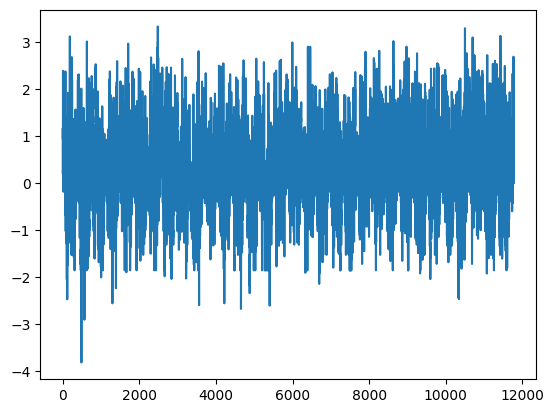

In [ ]:
SPI_data['SPI'].plot()

In [ ]:
# SPI_data.to_csv('../content/drive/My Drive/Yabelo/30yrDaily_yabeloMeteorology_data.csv')

In [ ]:
spi_data.shape

(11777, 11)

In [ ]:
spi_data.isnull().sum()

Date           0
YEAR           0
MO             0
DY             0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
PRECTOTCORR    0
WS10M_MAX      0
WS10M_MIN      0
SPI            0
dtype: int64

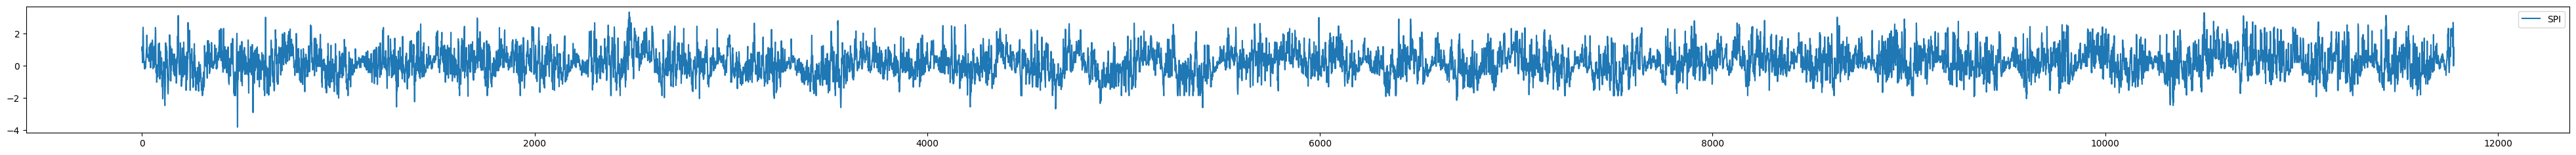

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(50, 2.5))
spi_data['SPI'].plot(ax=ax, label='SPI')
ax.legend();

In [ ]:
DroughtData = spi_data
DroughtData['Date'] = pd.to_datetime(DroughtData['Date'], format='%Y/%m/%d')
DroughtData=DroughtData.set_index('Date')
DroughtData.head()

YEAR  MO  DY  T2M_MAX  T2M_MIN  T2M_RANGE  PRECTOTCORR  WS10M_MAX  \
Date                                                                            
1991-01-01  1991   1   1    29.08    14.90    -258.98         0.41       8.74   
1991-01-02  1991   1   2    30.37    14.49    -257.27         1.18       7.62   
1991-01-03  1991   1   3    30.15    14.38    -257.38         0.14       7.35   
1991-01-04  1991   1   4    30.44    14.31    -257.02         0.00       7.45   
1991-01-05  1991   1   5    30.32    15.62    -258.45         0.06       6.55   

            WS10M_MIN       SPI  
Date                             
1991-01-01       4.27  0.953136  
1991-01-02       3.55  1.166742  
1991-01-03       3.63  0.666727  
1991-01-04       3.62  0.191052  
1991-01-05       3.12  0.412922

Text(0.5, 1.0, 'daily SPI')

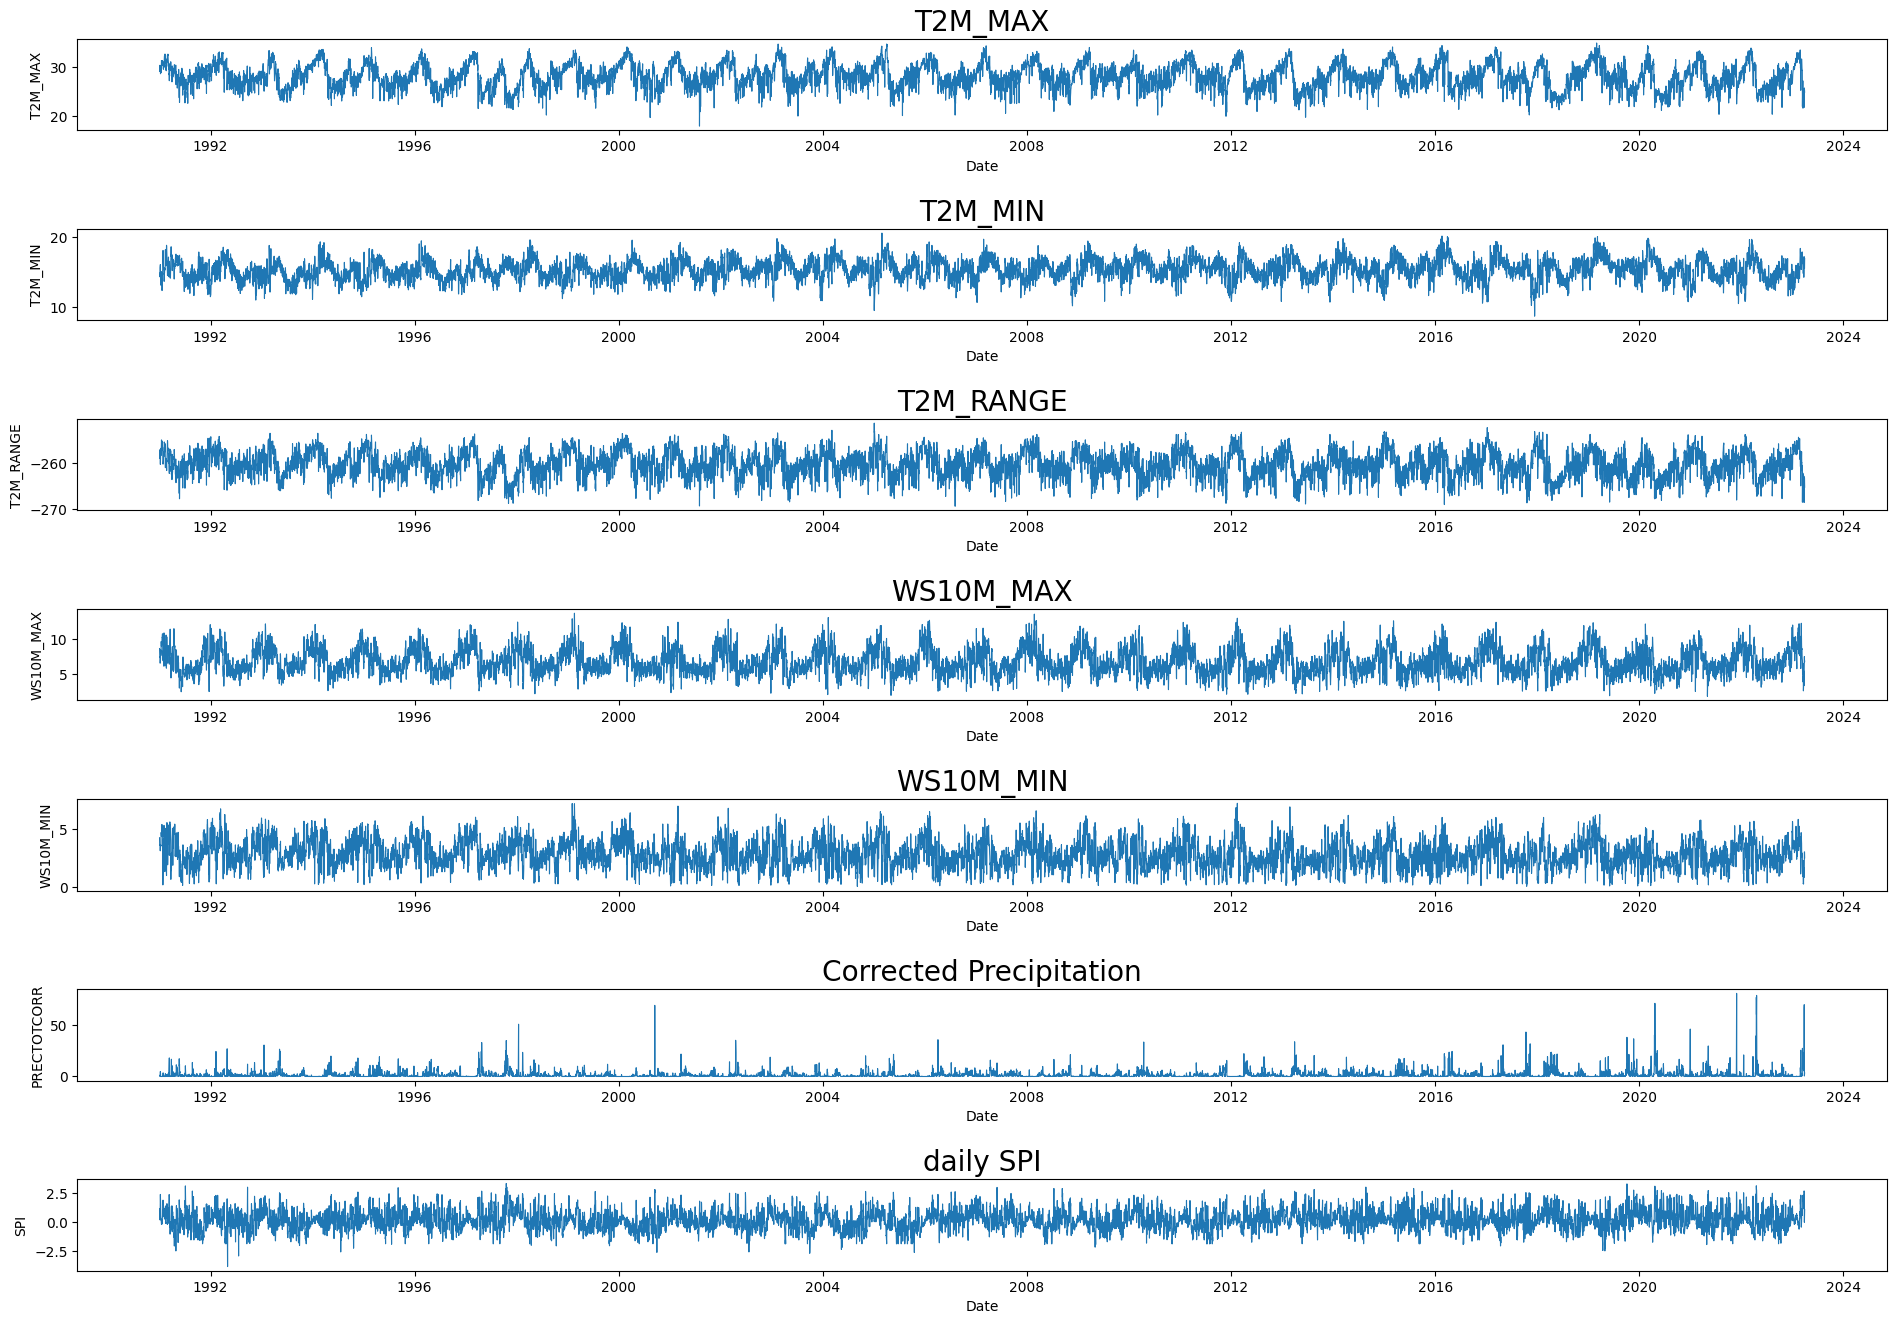

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=1, figsize=(20, 14), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(DroughtData["T2M_MAX"],linewidth=0.8,)
axes[0][0].set_ylabel("T2M_MAX")
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('T2M_MAX')

# Graph for NDVI
axes[1][0].plot(DroughtData["T2M_MIN"],linewidth=0.8)
axes[1][0].set_ylabel("T2M_MIN")
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('T2M_MIN')

# Graph for NDWI
axes[2][0].plot(DroughtData["T2M_RANGE"],linewidth=0.8)
axes[2][0].set_ylabel("T2M_RANGE")
axes[2][0].set_xlabel("Date")
axes[2][0].set_title('T2M_RANGE')

# Graph for NDVI
axes[3][0].plot(DroughtData["WS10M_MAX"],linewidth=0.8)
axes[3][0].set_ylabel("WS10M_MAX")
axes[3][0].set_xlabel("Date")
axes[3][0].set_title('WS10M_MAX')

# Graph for NDVI
axes[4][0].plot(DroughtData["WS10M_MIN"],linewidth=0.8)
axes[4][0].set_ylabel("WS10M_MIN")
axes[4][0].set_xlabel("Date")
axes[4][0].set_title('WS10M_MIN')

axes[5][0].plot(DroughtData["PRECTOTCORR"],linewidth=0.8,)
axes[5][0].set_ylabel("PRECTOTCORR")
axes[5][0].set_xlabel("Date")
axes[5][0].set_title('Precipitation')

# Graph for NDWI
axes[6][0].plot(DroughtData["SPI"],linewidth=0.8)
axes[6][0].set_ylabel("SPI")
axes[6][0].set_xlabel("Date")
axes[6][0].set_title('daily SPI')

### Testing for white noise & Random walk using the Ljung-Box test

> A random series drawn from independent identically distributed (IID) noise drawn from a normal distribution. Such a series is said to be a **white noise**.

> A **random walk** is defined by the sum of a white noise series. In other words, the value of the random walk is the cumulative sum of the preceding white noise series.

**spi**

In [ ]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(spi_data['SPI'], lags=[40], boxpierce=True)

lb_stat  lb_pvalue       bp_stat  bp_pvalue
40  16082.035591        0.0  16069.076446        0.0

> The value 16082.035591 is the value of the test statistic for the Ljung-Box test and 0.0 is its p-value as per the Chi-square(k=40) table.

> The value 16069.076446	is the test statistic of the Box-Pierce test and 0.0 is its p-value as per the Chi-square(k=40) tables.

> As we can see, both p-values are less than 0.01 and so we can say with 99% confidence that the vegitation index time series is not pure white noise.

##### Random Walks is a special case of the White Noise model
> we can detect random walk in the time series data by taking the first difference of the time series that is suspected to be a random walk, and run the white noise tests on the differenced series.

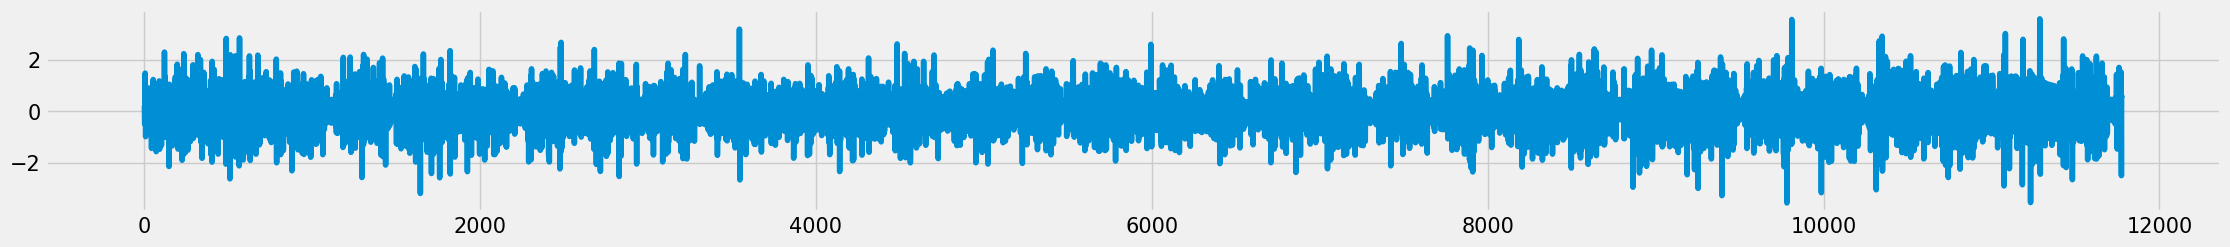

In [ ]:
diff_Y_i = spi_data['SPI'].diff()
#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()

#Let’s plot the diff-ed data set
diff_Y_i.plot(figsize=(25, 2.5))
plt.show()

In [ ]:
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True)

lb_stat      lb_pvalue     bp_stat      bp_pvalue
40  714.774889  1.725084e-124  714.481168  1.982483e-124

> Notice that this time the test statistic’s value 714.774889 reported by Ljung-Box, and 714.481168 reported by Box-Pierce tests is much smaller. And the corresponding p-values detected on the Chi-square(k=40) tables are below 0.05. so, we can the null hypothesis that the data (i.e. the differenced time series) is not white noise.

**precipitation**

In [ ]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(spi_data['PRECTOTCORR'], lags=[40], boxpierce=True)

lb_stat  lb_pvalue       bp_stat  bp_pvalue
40  10620.013538        0.0  10613.060845        0.0

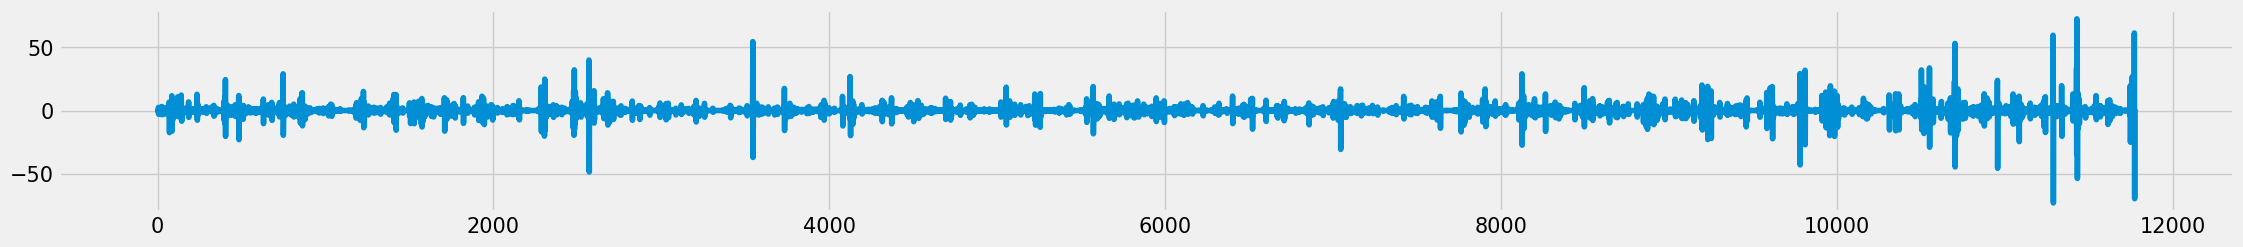

In [ ]:
diff_Y_i = spi_data['PRECTOTCORR'].diff()
#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()

#Let’s plot the diff-ed data set
diff_Y_i.plot(figsize=(25, 2.5))
plt.show()

In [ ]:
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True)

lb_stat      lb_pvalue      bp_stat      bp_pvalue
40  1149.025942  7.052909e-215  1148.586655  8.721849e-215

**Tmin**

In [ ]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(spi_data['T2M_MIN'], lags=[40], boxpierce=True)

lb_stat  lb_pvalue       bp_stat  bp_pvalue
40  78127.88855        0.0  78022.094146        0.0

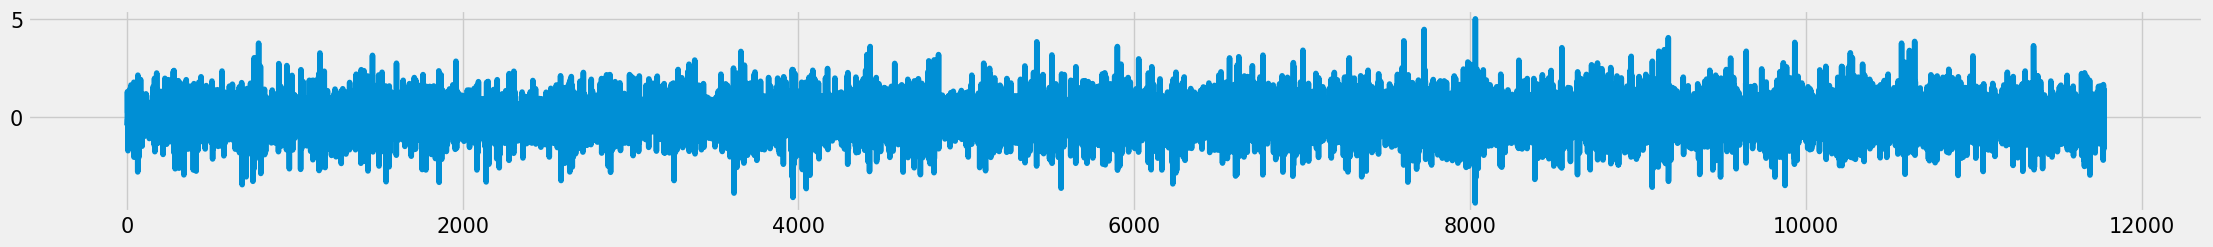

In [ ]:
diff_Y_i = spi_data['T2M_MIN'].diff()
#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()

#Let’s plot the diff-ed data set
diff_Y_i.plot(figsize=(25, 2.5))
plt.show()

In [ ]:
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True)

lb_stat      lb_pvalue     bp_stat      bp_pvalue
40  726.588159  6.404113e-127  726.321292  7.267515e-127

### Exploratory Data Analysis

> **Skewness** assesses the extent to which a variable’s distribution is symmetrical.
>
* between −1 and +1 is considered excellent
* between −2 and +2 is generally considered acceptable

* beyond −2 and +2 are considered indicative of substantial abnormality



> **Kurtosis** *is a measure of whether the distribution is too peaked or normal.*
>
* if > +2, the distribution is too peaked.
* if < −2, indicates a distribution is too flat.
*   When both skewness and kurtosis are close to zero, the pattern of responses is considered a normal distribution

> **High kurtosis** in a data set is an indicator that data has heavy tails or outliers.

In [ ]:
# Descriptive statistics
display(DroughtData.describe()) # For numeric columns

print("\nSkewness: \n", DroughtData.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", DroughtData.kurtosis(axis = 0, skipna = True))

YEAR            MO            DY       T2M_MAX       T2M_MIN  \
count  11777.000000  11777.000000  11777.000000  11777.000000  11777.000000   
mean    2006.624353      6.488664     15.726840     28.257595     15.291538   
std        9.308834      3.458910      8.799058      2.521621      1.469362   
min     1991.000000      1.000000      1.000000     17.870000      8.740000   
25%     1999.000000      3.000000      8.000000     26.510000     14.300000   
50%     2007.000000      6.000000     16.000000     28.230000     15.310000   
75%     2015.000000      9.000000     23.000000     30.090000     16.300000   
max     2023.000000     12.000000     31.000000     35.050000     20.510000   

          T2M_RANGE   PRECTOTCORR     WS10M_MAX     WS10M_MIN           SPI  
count  11777.000000  11777.000000  11777.000000  11777.000000  11777.000000  
mean    -260.183707      1.629429      6.789486      2.824330      0.194636  
std        2.815509      3.730987      1.837249      1.161906      0.831084  
min     -269.410000      0.000000      1.770000      0.010000     -3.823122  
25%     -262.020000      0.050000      5.470000      2.010000     -0.326027  
50%     -260.240000      0.460000      6.520000      2.740000      0.180761  
75%     -258.120000      1.720000      8.020000      3.590000      0.673659  
max     -251.200000     81.130000     13.750000      7.200000      3.325844


Skewness: 
 YEAR           0.001904
MO             0.001853
DY             0.006877
T2M_MAX       -0.079433
T2M_MIN       -0.085148
T2M_RANGE     -0.122413
PRECTOTCORR    8.226357
WS10M_MAX      0.444346
WS10M_MIN      0.265269
SPI            0.209599
dtype: float64

Kurtosis: 
 YEAR            -1.199608
MO              -1.215914
DY              -1.193884
T2M_MAX         -0.390020
T2M_MIN          0.064074
T2M_RANGE       -0.341129
PRECTOTCORR    115.524062
WS10M_MAX       -0.144521
WS10M_MIN       -0.152729
SPI              0.393081
dtype: float64


### downsampling our data to weekly basis

In [ ]:
df_downsampled = spi_data[['Date','T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN','SPI','PRECTOTCORR']].resample('7D', on='Date').mean().reset_index(drop=False)

#df_downsampled['PRECTOTCORR'] = spi_data[['Date','PRECTOTCORR']].resample('7D', on='Date').sum().reset_index(drop=False)['PRECTOTCORR']
df_downsampled.head()

Date    T2M_MAX    T2M_MIN   T2M_RANGE  WS10M_MAX  WS10M_MIN  \
0 1991-01-01  29.850000  15.088571 -258.390000   7.310000   3.484286   
1 1991-01-08  29.547143  13.811429 -257.414286   8.328571   3.977143   
2 1991-01-15  30.847143  13.178571 -255.484286   9.750000   4.884286   
3 1991-01-22  30.778571  16.117143 -258.488571   8.254286   2.808571   
4 1991-01-29  30.702857  14.931429 -257.380000   8.171429   3.950000   

        SPI  PRECTOTCORR  
0  1.096383     1.281429  
1  0.533625     0.281429  
2 -0.004637     0.000000  
3  1.029821     1.040000  
4  0.567749     0.047143

In [ ]:
data_downsampled=df_downsampled.set_index('Date')

In [ ]:
data_downsampled.head()

T2M_MAX    T2M_MIN   T2M_RANGE  WS10M_MAX  WS10M_MIN       SPI  \
Date                                                                           
1991-01-01  29.850000  15.088571 -258.390000   7.310000   3.484286  1.096383   
1991-01-08  29.547143  13.811429 -257.414286   8.328571   3.977143  0.533625   
1991-01-15  30.847143  13.178571 -255.484286   9.750000   4.884286 -0.004637   
1991-01-22  30.778571  16.117143 -258.488571   8.254286   2.808571  1.029821   
1991-01-29  30.702857  14.931429 -257.380000   8.171429   3.950000  0.567749   

            PRECTOTCORR  
Date                     
1991-01-01     1.281429  
1991-01-08     0.281429  
1991-01-15     0.000000  
1991-01-22     1.040000  
1991-01-29     0.047143

In [ ]:
#data_downsampled.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/dailySPI_downsampled.csv')

Text(0.5, 1.0, 'weekly SPI')

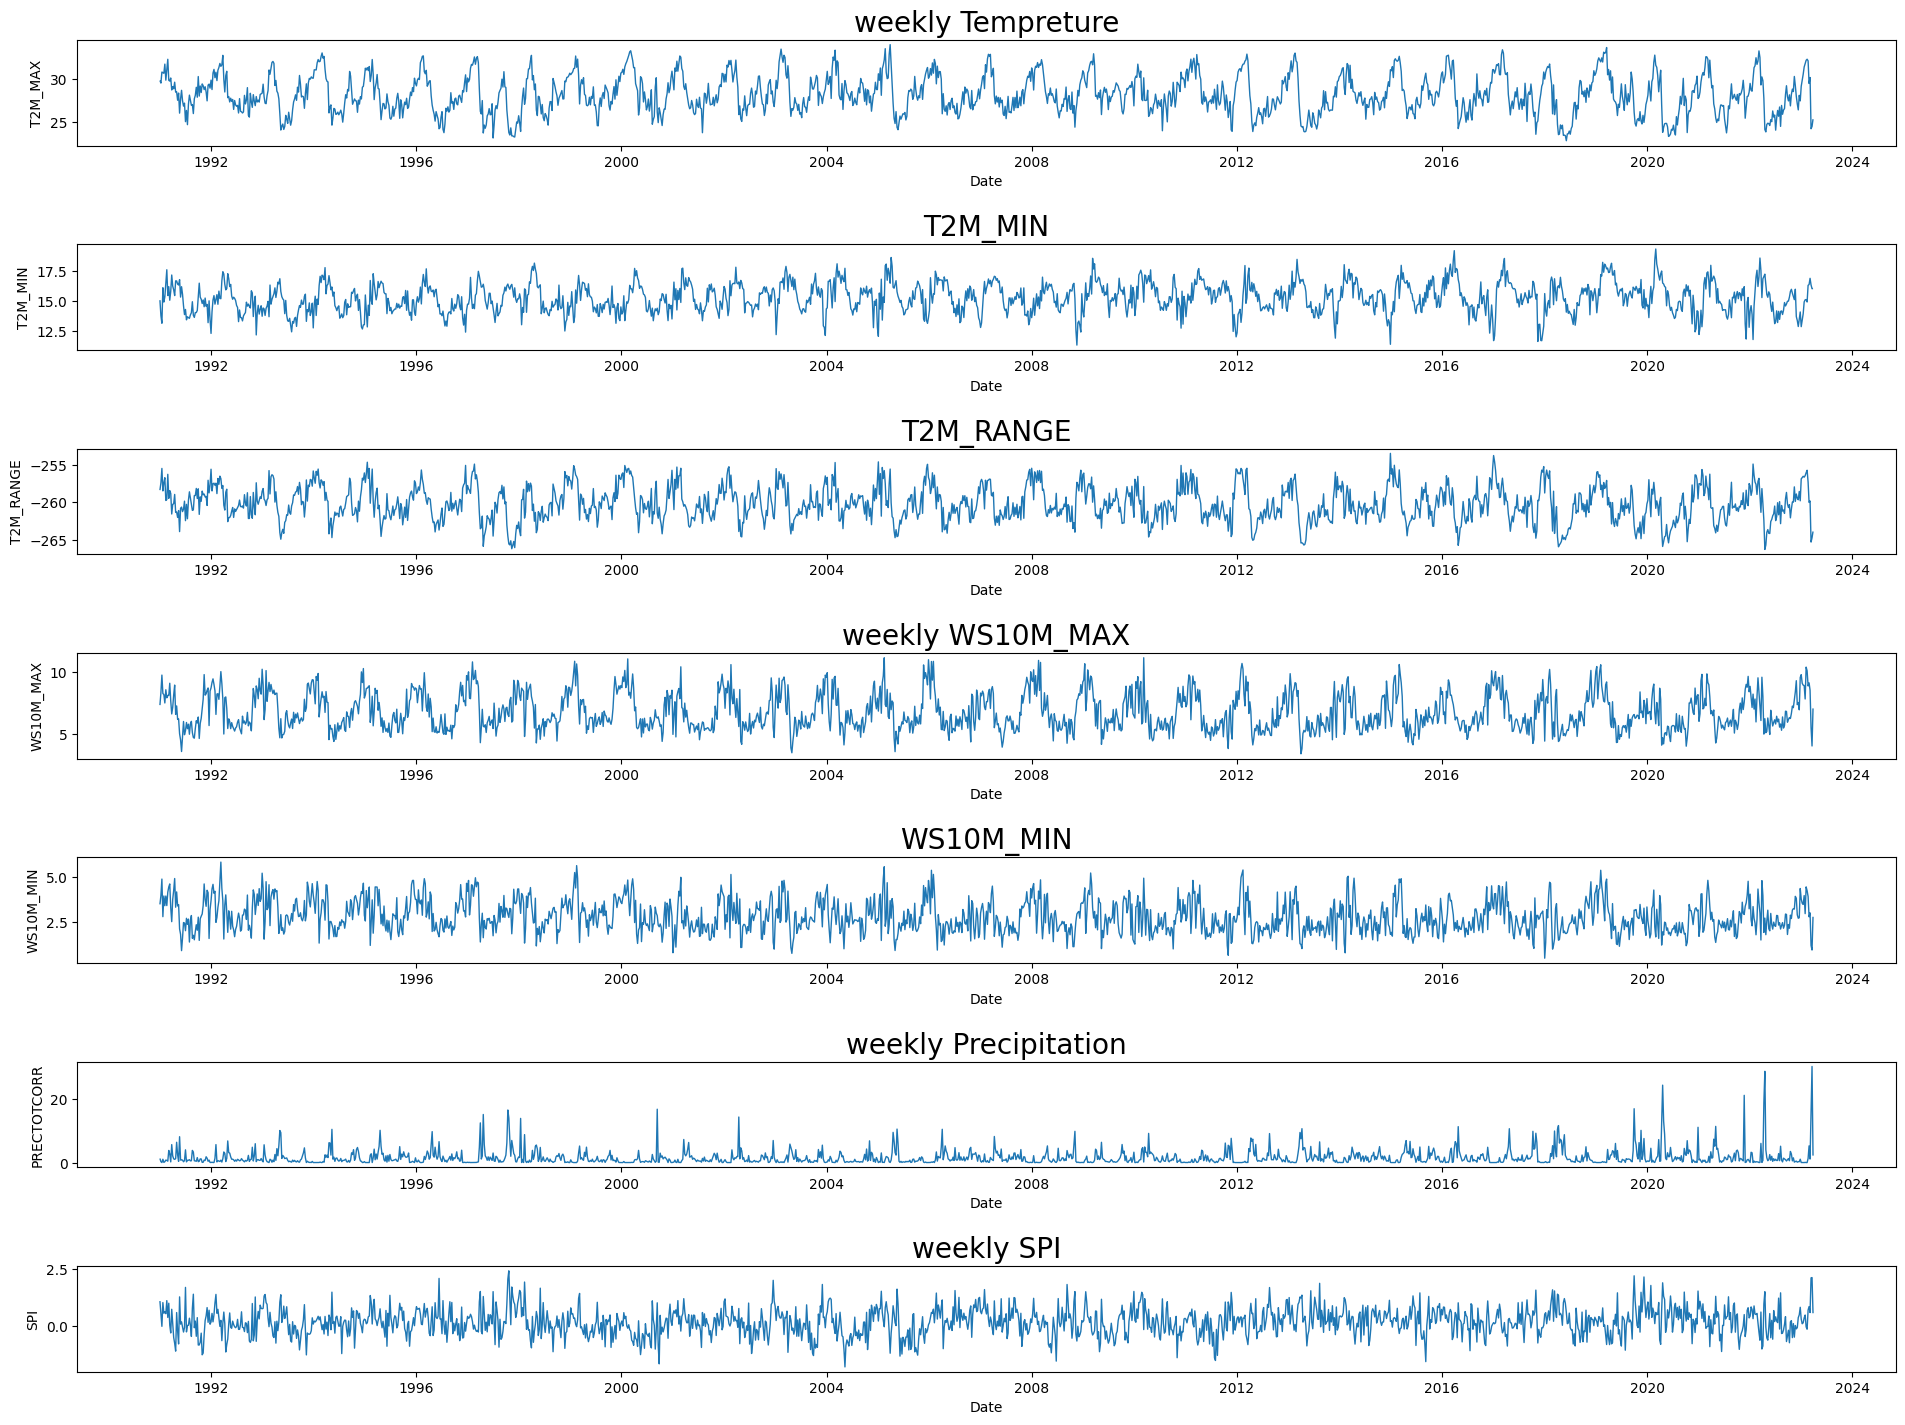

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=1, figsize=(20, 15), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(data_downsampled["T2M_MAX"],linewidth=1)
axes[0][0].set_ylabel("T2M_MAX")
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('weekly Tempreture')

# Graph for NDVI
axes[1][0].plot(data_downsampled["T2M_MIN"],linewidth=1)
axes[1][0].set_ylabel("T2M_MIN")
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('T2M_MIN')

# Graph for NDWI
axes[2][0].plot(data_downsampled["T2M_RANGE"],linewidth=1)
axes[2][0].set_ylabel("T2M_RANGE")
axes[2][0].set_xlabel("Date")
axes[2][0].set_title('T2M_RANGE')

# Graph for NDVI
axes[3][0].plot(data_downsampled["WS10M_MAX"],linewidth=1)
axes[3][0].set_ylabel("WS10M_MAX")
axes[3][0].set_xlabel("Date")
axes[3][0].set_title('weekly WS10M_MAX')

# Graph for NDVI
axes[4][0].plot(data_downsampled["WS10M_MIN"],linewidth=1)
axes[4][0].set_ylabel("WS10M_MIN")
axes[4][0].set_xlabel("Date")
axes[4][0].set_title('WS10M_MIN')

axes[5][0].plot(data_downsampled["PRECTOTCORR"],linewidth=1)
axes[5][0].set_ylabel("PRECTOTCORR")
axes[5][0].set_xlabel("Date")
axes[5][0].set_title('weekly Precipitation')

# Graph for NDWI
axes[6][0].plot(data_downsampled["SPI"],linewidth=1)
axes[6][0].set_ylabel("SPI")
axes[6][0].set_xlabel("Date")
axes[6][0].set_title('weekly SPI')

Text(0.5, 1.0, 'weekly SPI')

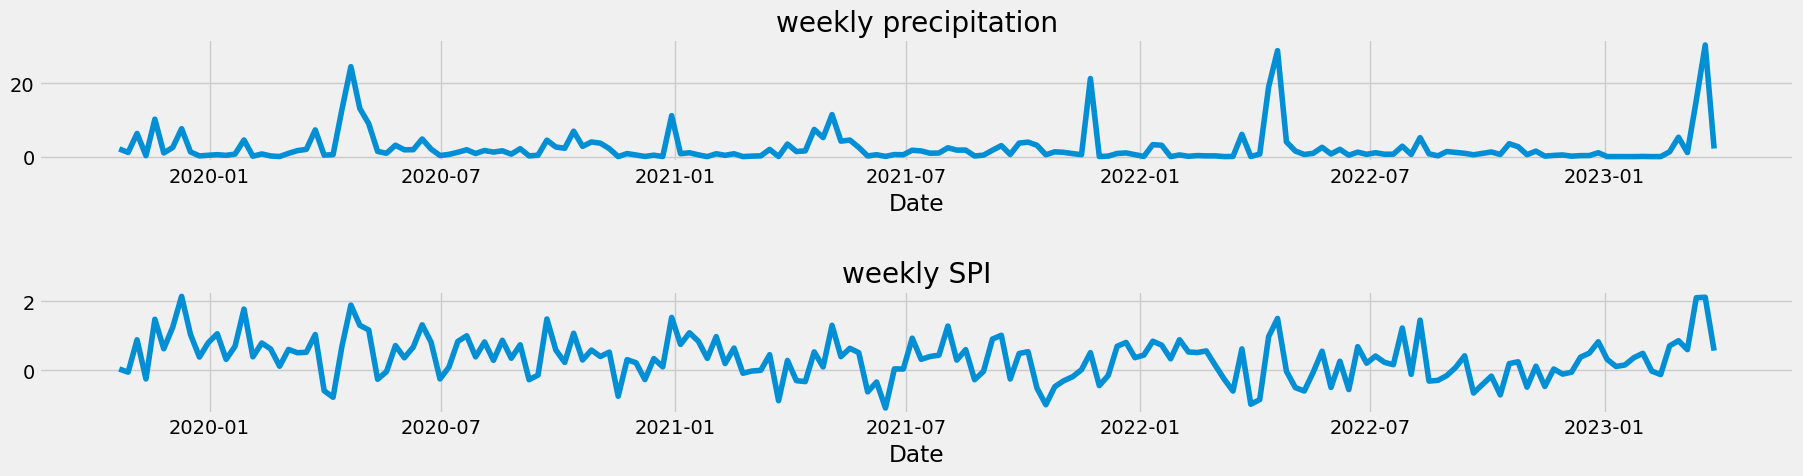

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20, 6),squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(data_downsampled[-180:]["PRECTOTCORR"])
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('weekly precipitation')

# Graph for NDVI
axes[1][0].plot(data_downsampled[-180:]["SPI"])
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('weekly SPI')

### Exploratory Data Analysis

In [ ]:
# Descriptive statistics
display(data_downsampled.describe()) # For numeric columns

print("\nSkewness: \n", data_downsampled.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", data_downsampled.kurtosis(axis = 0, skipna = True))

T2M_MAX      T2M_MIN    T2M_RANGE    WS10M_MAX    WS10M_MIN  \
count  1683.000000  1683.000000  1683.000000  1683.000000  1683.000000   
mean     28.256588    15.291798  -260.184975     6.789572     2.824322   
std       2.240334     1.223550     2.318578     1.517888     0.900784   
min      22.751429    11.372857  -266.321429     3.354286     0.515714   
25%      26.706429    14.439286  -261.807857     5.611429     2.172857   
50%      28.022857    15.267143  -260.357143     6.420000     2.701429   
75%      29.893571    16.150000  -258.655714     7.923571     3.425714   
max      34.078571    19.321429  -253.470000    11.160000     5.821429   

               SPI  PRECTOTCORR  
count  1683.000000  1683.000000  
mean      0.194762     1.629621  
std       0.598720     2.517425  
min      -1.773136     0.000000  
25%      -0.191559     0.232857  
50%       0.195350     0.821429  
75%       0.551028     1.990000  
max       2.414313    30.381429


Skewness: 
 T2M_MAX        0.147893
T2M_MIN       -0.031661
T2M_RANGE      0.086201
WS10M_MAX      0.502823
WS10M_MIN      0.432755
SPI            0.121634
PRECTOTCORR    4.399964
dtype: float64

Kurtosis: 
 T2M_MAX        -0.545933
T2M_MIN        -0.079050
T2M_RANGE      -0.387115
WS10M_MAX      -0.542914
WS10M_MIN      -0.278471
SPI             0.311267
PRECTOTCORR    30.887563
dtype: float64


### Cheak the time interval and the chronological order of the data

In [ ]:
# Sort values by timestamp (not necessary in this case)
Indices_data = df_downsampled.sort_values(by='Date')

# Check time intervals
Indices_data['Time_Interval'] = Indices_data.Date - Indices_data.Date.shift(1)

Indices_data[['Date', 'Time_Interval']].head()

Date Time_Interval
0 1991-01-01           NaT
1 1991-01-08        7 days
2 1991-01-15        7 days
3 1991-01-22        7 days
4 1991-01-29        7 days

In [ ]:
print(f"{Indices_data['Time_Interval'].value_counts()}")
Indices_data = Indices_data.drop('Time_Interval', axis=1)
Indices_data.head()

7 days    1682
Name: Time_Interval, dtype: int64


Date    T2M_MAX    T2M_MIN   T2M_RANGE  WS10M_MAX  WS10M_MIN  \
0 1991-01-01  29.850000  15.088571 -258.390000   7.310000   3.484286   
1 1991-01-08  29.547143  13.811429 -257.414286   8.328571   3.977143   
2 1991-01-15  30.847143  13.178571 -255.484286   9.750000   4.884286   
3 1991-01-22  30.778571  16.117143 -258.488571   8.254286   2.808571   
4 1991-01-29  30.702857  14.931429 -257.380000   8.171429   3.950000   

        SPI  PRECTOTCORR  year  month  day  day_of_year  week_of_year  \
0  1.096383     1.281429  1991      1    1            1             1   
1  0.533625     0.281429  1991      1    8            8             2   
2 -0.004637     0.000000  1991      1   15           15             3   
3  1.029821     1.040000  1991      1   22           22             4   
4  0.567749     0.047143  1991      1   29           29             5   

   quarter  season  
0        1       1  
1        1       1  
2        1       1  
3        1       1  
4        1       1

### Timeseries Component Decomposition

> The characteristics of a time series are

*   Trend and Level
*   Seasonality
*  Stationary







In [ ]:
df_downsampled['Date'] = pd.to_datetime(df_downsampled['Date'], format='%Y/%m/%d')
df_downsampled=df_downsampled.set_index('Date')
df_downsampled=df_downsampled.asfreq('7D')
df_downsampled

T2M_MAX    T2M_MIN   T2M_RANGE  WS10M_MAX  WS10M_MIN       SPI  \
Date                                                                           
1991-01-01  29.850000  15.088571 -258.390000   7.310000   3.484286  1.096383   
1991-01-08  29.547143  13.811429 -257.414286   8.328571   3.977143  0.533625   
1991-01-15  30.847143  13.178571 -255.484286   9.750000   4.884286 -0.004637   
1991-01-22  30.778571  16.117143 -258.488571   8.254286   2.808571  1.029821   
1991-01-29  30.702857  14.931429 -257.380000   8.171429   3.950000  0.567749   
...               ...        ...         ...        ...        ...       ...   
2023-02-28  29.501429  16.382857 -260.031429   9.117143   2.801429  0.856139   
2023-03-07  30.202857  16.895714 -259.841429   8.522857   3.018571  0.595805   
2023-03-14  24.164286  16.350000 -265.334286   5.500000   1.221429  2.106838   
2023-03-21  24.430000  16.037143 -264.760000   3.991429   0.965714  2.120727   
2023-03-28  25.290000  16.056667 -263.916667   7.043333   2.803333  0.565969   

            PRECTOTCORR  
Date                     
1991-01-01     1.281429  
1991-01-08     0.281429  
1991-01-15     0.000000  
1991-01-22     1.040000  
1991-01-29     0.047143  
...                 ...  
2023-02-28     5.272857  
2023-03-07     1.105714  
2023-03-14    15.364286  
2023-03-21    30.381429  
2023-03-28     2.193333  

[1683 rows x 7 columns]

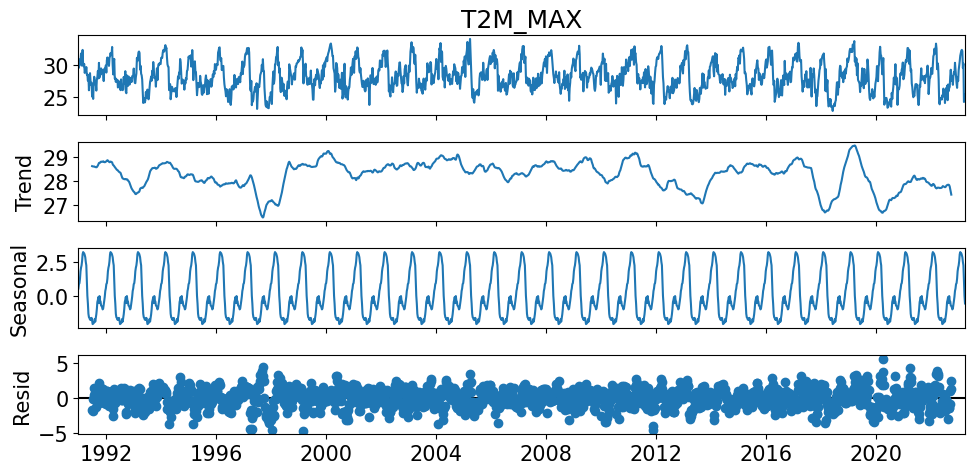

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(data_downsampled.T2M_MAX,model='additive')
fig = result.plot()

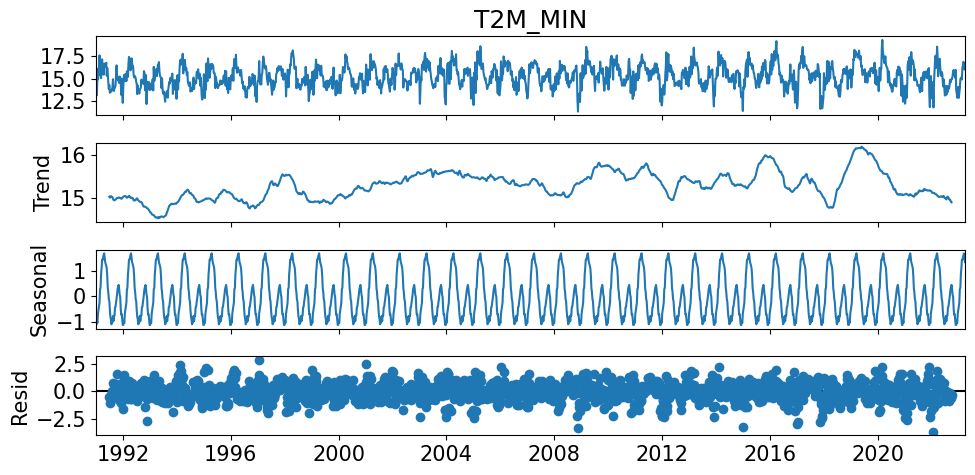

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(data_downsampled.T2M_MIN,model='additive')
fig = result.plot()

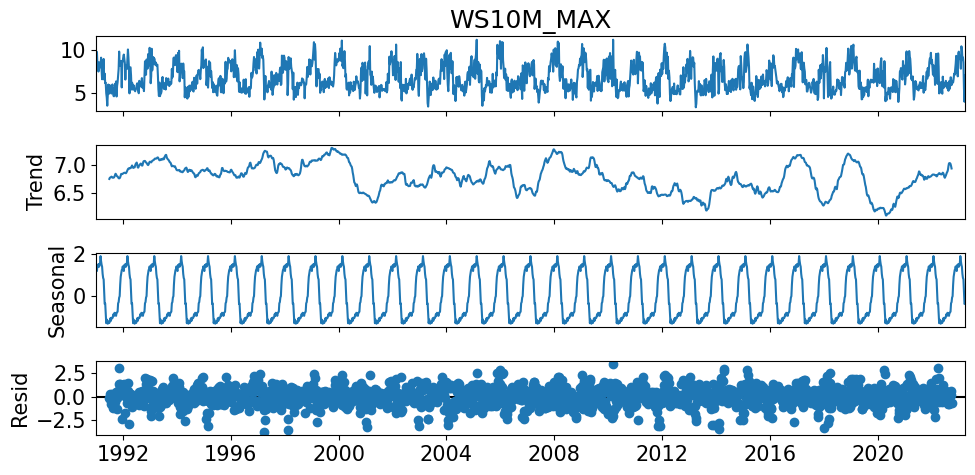

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(data_downsampled.WS10M_MAX,model='additive')
fig = result.plot()

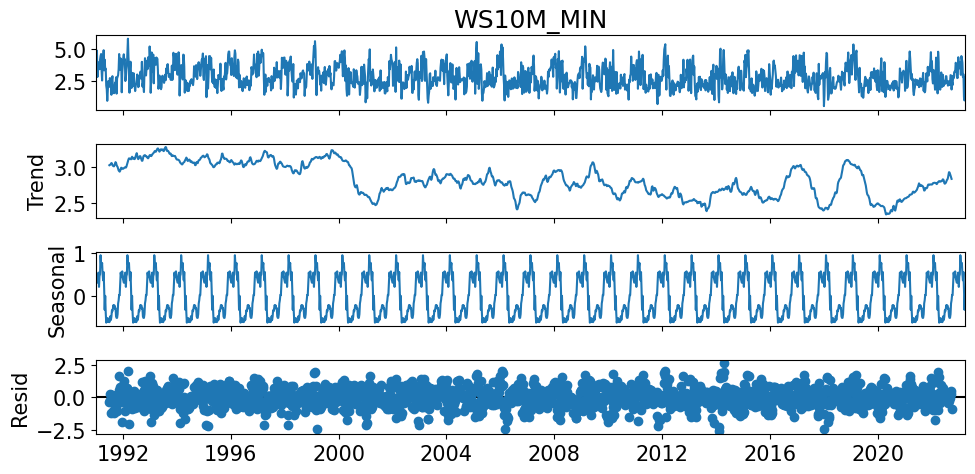

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(data_downsampled.WS10M_MIN,model='additive')
fig = result.plot()

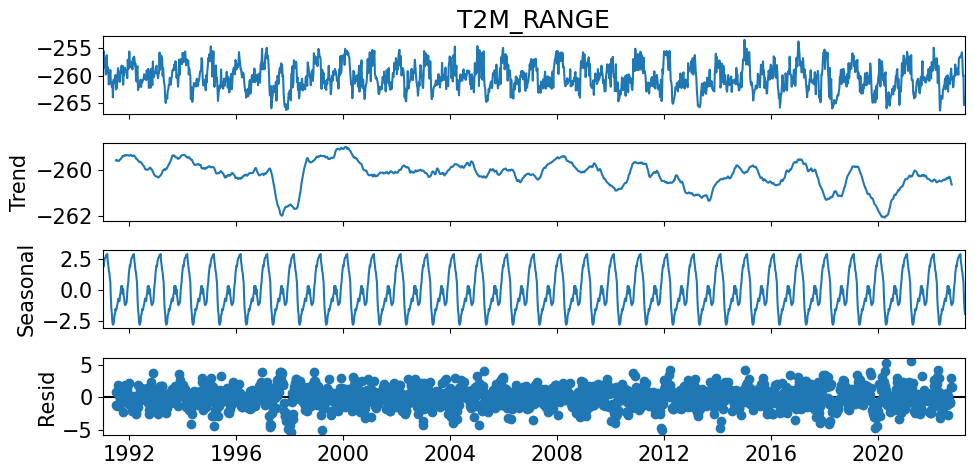

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(data_downsampled.T2M_RANGE,model='additive')
fig = result.plot()

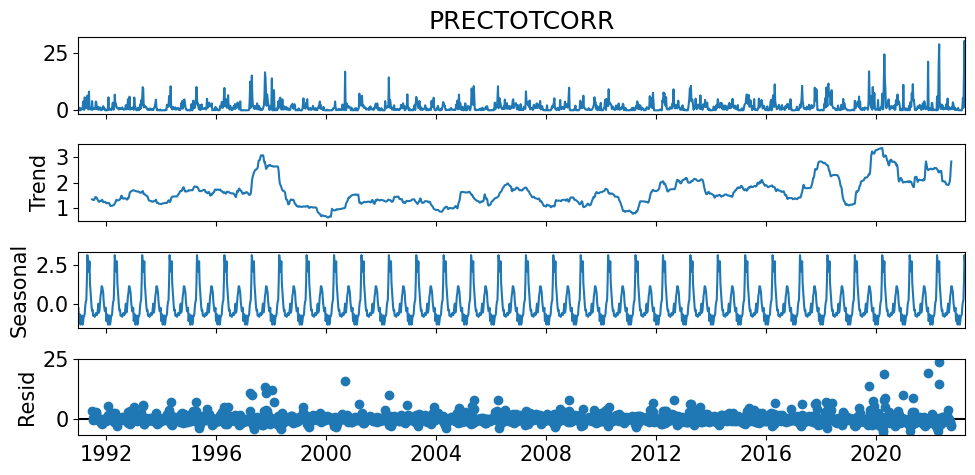

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(data_downsampled.PRECTOTCORR,model='additive')
fig = result.plot()

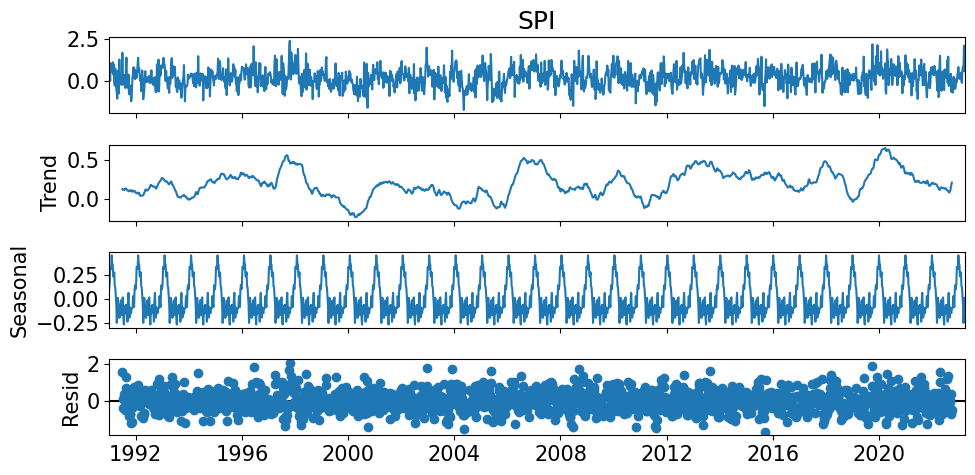

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(data_downsampled.SPI,model='additive')
fig = result.plot()

> We can see wave but steady trend and extream seasonality in this data.


In [ ]:
#let’s test the series’ stationarity using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_downsampled['T2M_MIN'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF critical values:', crit_vals)

ADF test statistic: -13.46058495931475
ADF p-values: 3.5364047176453937e-25
ADF critical values: {'1%': -3.4342670860570723, '5%': -2.8632701714229905, '10%': -2.567691100492777}


In [ ]:
#let’s test the series’ stationarity using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_downsampled['SPI'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF critical values:', crit_vals)

ADF test statistic: -12.495766539343528
ADF p-values: 2.878602147640222e-23
ADF critical values: {'1%': -3.4342530582756807, '5%': -2.8632639794173427, '10%': -2.5676878033472508}


In [ ]:
#let’s test the series’ stationarity using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_downsampled['PRECTOTCORR'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF critical values:', crit_vals)

ADF test statistic: -6.961108777427561
ADF p-values: 9.159720876398749e-10
ADF critical values: {'1%': -3.434300212992577, '5%': -2.863284793874921, '10%': -2.567698886736967}




> If this p-value < 0.05 you can reject the null hypothesis (reject non-stationarity i.e. data is stationary => no trend)

>In this case, we can reject the null hypothesis and will have to assume that the data is stationary (no trend).

> ADF statistic < critical value: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


### Autocorrelation Analysis

> Autocorrelation is the correlation between  current value with past values.

> The PACF is an alternative to the ACF. Rather than giving the autocorrelations, it gives you the partial autocorrelation.

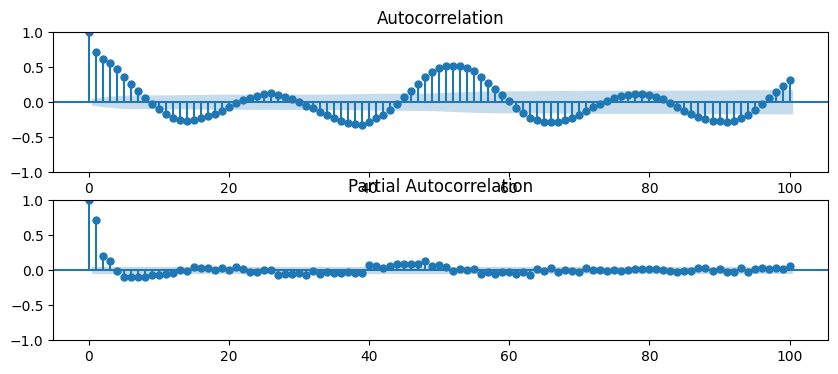

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

plot_acf(df_downsampled['T2M_MIN'],lags=100, ax=ax[0])
plot_pacf(df_downsampled['T2M_MIN'],lags=100, ax=ax[1])
plt.show()

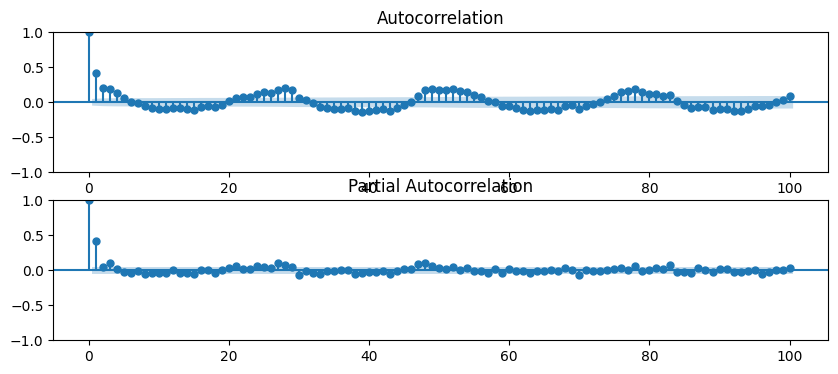

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

plot_acf(df_downsampled['PRECTOTCORR'],lags=100, ax=ax[0])
plot_pacf(df_downsampled['PRECTOTCORR'],lags=100, ax=ax[1])
plt.show()

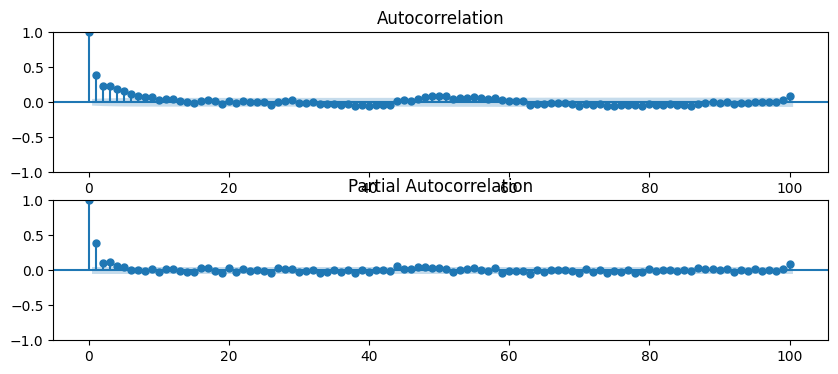

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

plot_acf(df_downsampled['SPI'],lags=100, ax=ax[0])
plot_pacf(df_downsampled['SPI'],lags=100, ax=ax[1])
plt.show()

> Notice that the SPI and precipitation data of ACF plot looks like no auto-coorelation between sample of data.

### Anomaly detecton and correction

In [ ]:
data_downsampled=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/dailySPI_downsampled.csv')
data_downsampled.Date= pd.to_datetime(data_downsampled.Date, format='%Y/%m/%d')
#data_downsampled = data_downsampled.set_index('Date')
data_downsampled

Date    T2M_MAX    T2M_MIN   T2M_RANGE  WS10M_MAX  WS10M_MIN  \
0    1991-01-01  29.850000  15.088571 -258.390000   7.310000   3.484286   
1    1991-01-08  29.547143  13.811429 -257.414286   8.328571   3.977143   
2    1991-01-15  30.847143  13.178571 -255.484286   9.750000   4.884286   
3    1991-01-22  30.778571  16.117143 -258.488571   8.254286   2.808571   
4    1991-01-29  30.702857  14.931429 -257.380000   8.171429   3.950000   
...         ...        ...        ...         ...        ...        ...   
1678 2023-02-28  29.501429  16.382857 -260.031429   9.117143   2.801429   
1679 2023-03-07  30.202857  16.895714 -259.841429   8.522857   3.018571   
1680 2023-03-14  24.164286  16.350000 -265.334286   5.500000   1.221429   
1681 2023-03-21  24.430000  16.037143 -264.760000   3.991429   0.965714   
1682 2023-03-28  25.290000  16.056667 -263.916667   7.043333   2.803333   

           SPI  PRECTOTCORR  
0     1.096383         8.97  
1     0.533625         1.97  
2    -0.004637         0.00  
3     1.029821         7.28  
4     0.567749         0.33  
...        ...          ...  
1678  0.856139        36.91  
1679  0.595805         7.74  
1680  2.106838       107.55  
1681  2.120727       212.67  
1682  0.565969         6.58  

[1683 rows x 8 columns]

<Axes: xlabel='Date'>

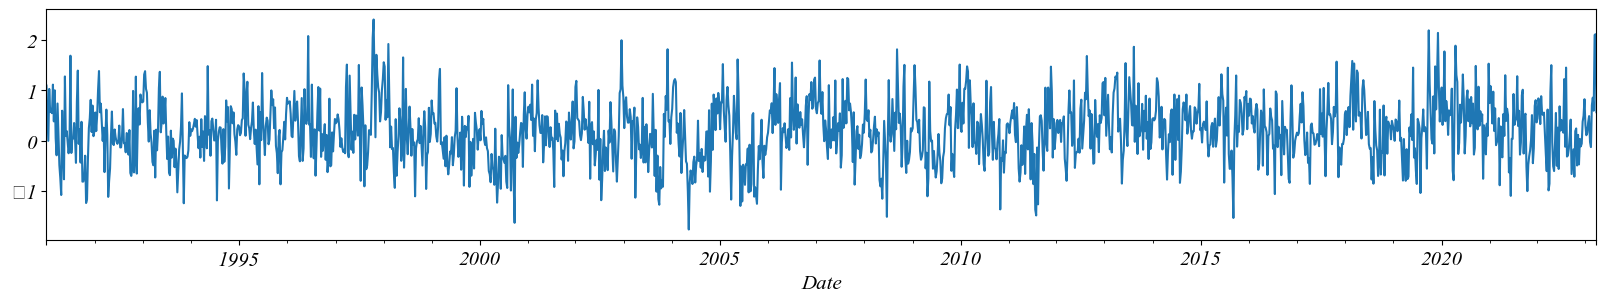

In [ ]:
plt.rc('figure',figsize=(20,3))
plt.rc('font',size=15)
data_downsampled['SPI'].plot()

<Axes: xlabel='Date'>

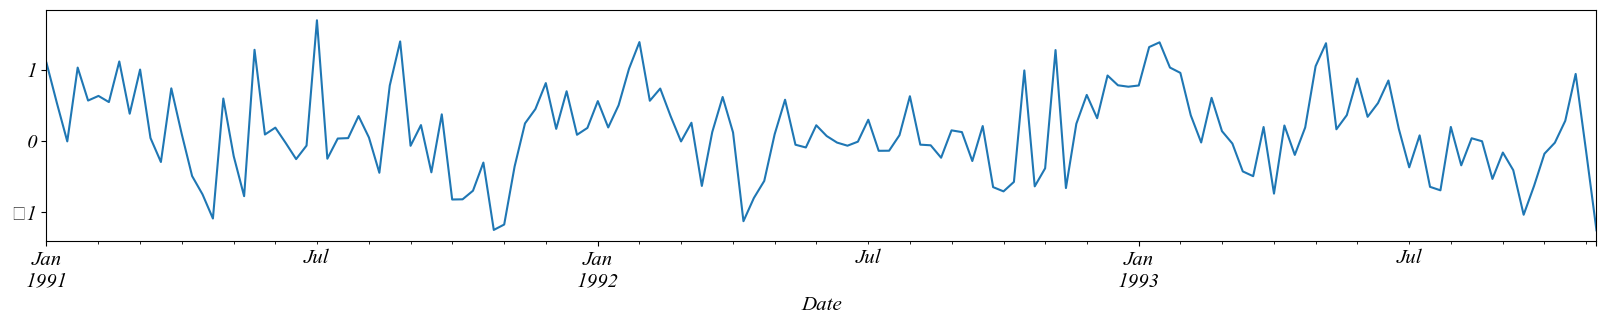

In [ ]:
data_downsampled[:150]['SPI'].plot()

> here we can see that htere is sinusoidal cycle i.e. seasonality every 6 month jan,july

**Outlier detection using Classification and Regression Trees (CART)**

>Isolation Forest detects anomalies purely based on the fact that anomalies are data points that are few and different. The anomalies isolation is implemented without employing any distance or density measure.

* contamination = outliers_fraction tells the model what proportion of outliers are present in the data.
* This is a trial/error metric.
* Fit and predict (data) performs outlier detection on data, and returns 1 for normal, -1 for the anomaly.

In [ ]:
all_downsampled=data_downsampled[['T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN','SPI','PRECTOTCORR']].squeeze()
all_downsampled.index= pd.to_datetime(all_downsampled.index, format='%Y/%m/%d')
all_downsampled

T2M_MAX    T2M_MIN   T2M_RANGE  WS10M_MAX  \
1970-01-01 00:00:00.000000000  29.850000  15.088571 -258.390000   7.310000   
1970-01-01 00:00:00.000000001  29.547143  13.811429 -257.414286   8.328571   
1970-01-01 00:00:00.000000002  30.847143  13.178571 -255.484286   9.750000   
1970-01-01 00:00:00.000000003  30.778571  16.117143 -258.488571   8.254286   
1970-01-01 00:00:00.000000004  30.702857  14.931429 -257.380000   8.171429   
...                                  ...        ...         ...        ...   
1970-01-01 00:00:00.000001678  29.501429  16.382857 -260.031429   9.117143   
1970-01-01 00:00:00.000001679  30.202857  16.895714 -259.841429   8.522857   
1970-01-01 00:00:00.000001680  24.164286  16.350000 -265.334286   5.500000   
1970-01-01 00:00:00.000001681  24.430000  16.037143 -264.760000   3.991429   
1970-01-01 00:00:00.000001682  25.290000  16.056667 -263.916667   7.043333   

                               WS10M_MIN       SPI  PRECTOTCORR  
1970-01-01 00:00:00.000000000   3.484286  1.096383         8.97  
1970-01-01 00:00:00.000000001   3.977143  0.533625         1.97  
1970-01-01 00:00:00.000000002   4.884286 -0.004637         0.00  
1970-01-01 00:00:00.000000003   2.808571  1.029821         7.28  
1970-01-01 00:00:00.000000004   3.950000  0.567749         0.33  
...                                  ...       ...          ...  
1970-01-01 00:00:00.000001678   2.801429  0.856139        36.91  
1970-01-01 00:00:00.000001679   3.018571  0.595805         7.74  
1970-01-01 00:00:00.000001680   1.221429  2.106838       107.55  
1970-01-01 00:00:00.000001681   0.965714  2.120727       212.67  
1970-01-01 00:00:00.000001682   2.803333  0.565969         6.58  

[1683 rows x 7 columns]

In [ ]:
from sklearn.ensemble import IsolationForest
pdata=data_downsampled['PRECTOTCORR'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(pdata.values.reshape(-1, 1))
pdata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(pdata)

IsolationForest(contamination=0.01)

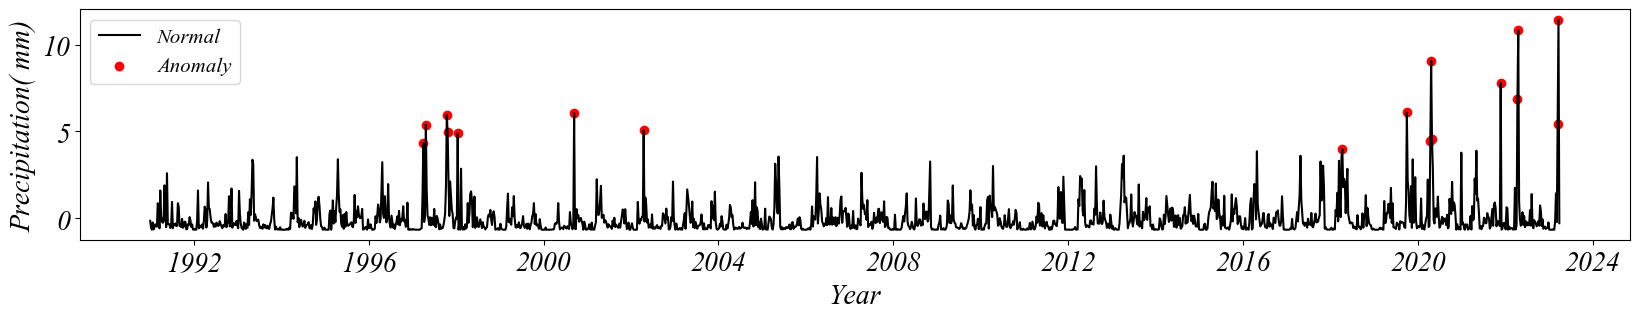

In [ ]:
pdata['anomaly'] = model.predict(pdata[0].values.reshape(-1, 1))
# visualization
fig, ax = plt.subplots(figsize=(20,3))
a = pdata.loc[pdata['anomaly'] == -1, [0]] #anomaly
ax.plot(pdata.index, pdata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Precipitation( mm)",fontsize=20)
plt.legend()
plt.show();

In [ ]:
pdata ['Date']=data_downsampled.Date
pdata

0       Date
0     -0.138057 1991-01-01
1     -0.535403 1991-01-08
2     -0.647228 1991-01-15
3     -0.233988 1991-01-22
4     -0.628496 1991-01-29
...         ...        ...
1678   1.447923 2023-02-28
1679  -0.207877 2023-03-07
1680   5.457716 2023-03-14
1681  11.424724 2023-03-21
1682  -0.273722 2023-03-28

[1683 rows x 2 columns]

In [ ]:
pdata = pdata.set_index('Date')

In [ ]:
from sklearn.ensemble import IsolationForest
spidata=all_downsampled['SPI'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(spidata.values.reshape(-1, 1))
spidata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(spidata)

IsolationForest(contamination=0.01)

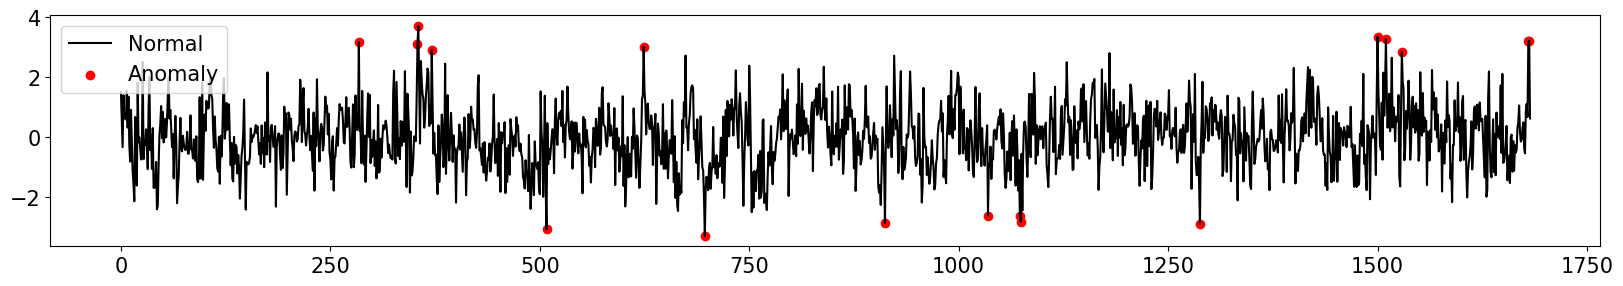

In [ ]:
spidata['anomaly'] = model.predict(spidata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = spidata.loc[spidata['anomaly'] == -1, [0]] #anomaly
ax.plot(spidata.index, spidata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
from sklearn.ensemble import IsolationForest
tmaxdata=all_downsampled['T2M_MAX'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(tmaxdata.values.reshape(-1, 1))
tmaxdata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(tmaxdata)

IsolationForest(contamination=0.01)

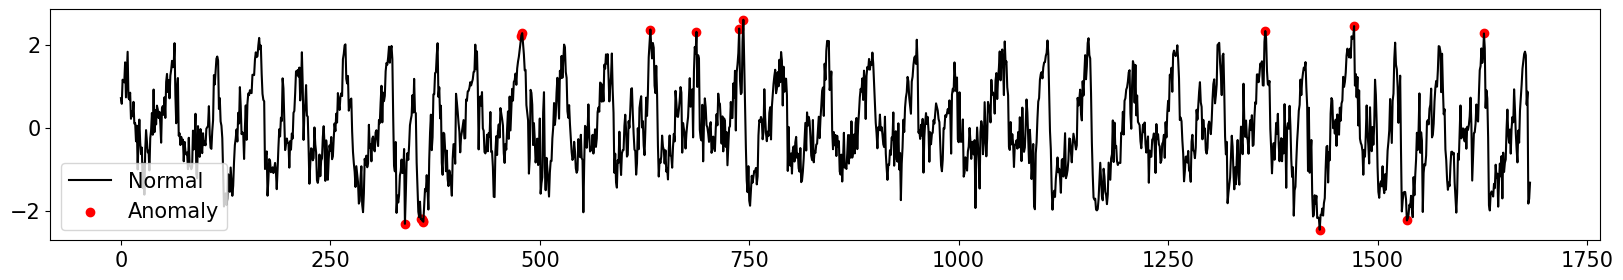

In [ ]:
tmaxdata['anomaly'] = model.predict(tmaxdata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = tmaxdata.loc[tmaxdata['anomaly'] == -1, [0]] #anomaly
ax.plot(tmaxdata.index, tmaxdata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
from sklearn.ensemble import IsolationForest
tmindata=all_downsampled['T2M_MIN'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(tmindata.values.reshape(-1, 1))
tmindata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(tmindata)

IsolationForest(contamination=0.01)

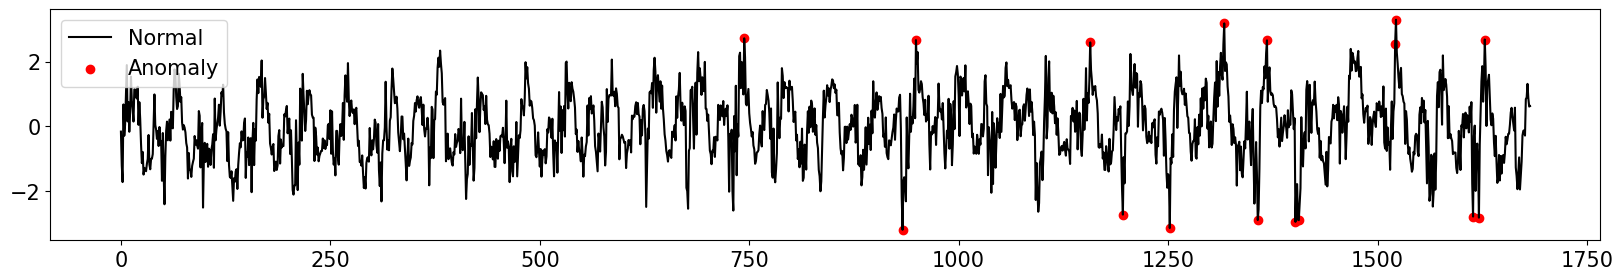

In [ ]:
tmindata['anomaly'] = model.predict(tmindata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = tmindata.loc[tmindata['anomaly'] == -1, [0]] #anomaly
ax.plot(tmindata.index, tmindata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
tmindata.head()

0  anomaly
0 -0.166145        1
1 -1.210256        1
2 -1.727640        1
3  0.674750        1
4 -0.294615        1

In [ ]:
from sklearn.ensemble import IsolationForest
trngdata=all_downsampled['T2M_RANGE'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(trngdata.values.reshape(-1, 1))
trngdata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(trngdata)

IsolationForest(contamination=0.01)

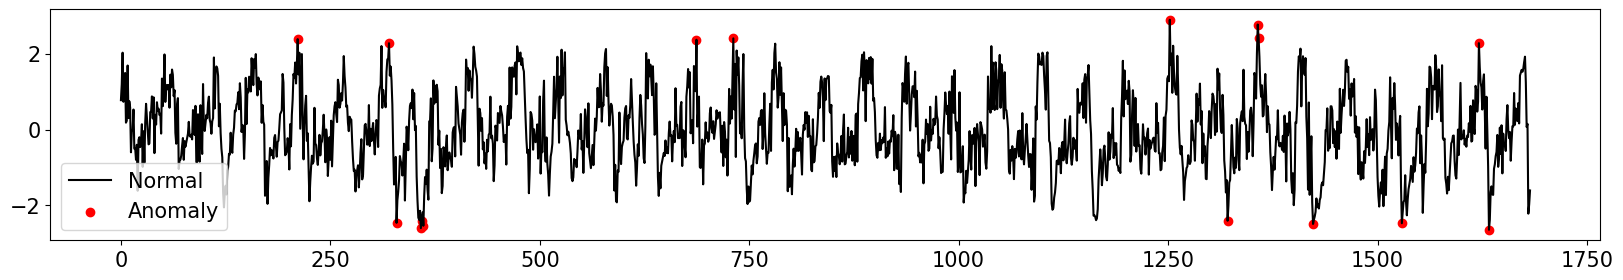

In [ ]:
trngdata['anomaly'] = model.predict(trngdata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = trngdata.loc[trngdata['anomaly'] == -1, [0]] #anomaly
ax.plot(trngdata.index, trngdata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
trngdata.head()

0  anomaly
0  0.774401        1
1  1.195350        1
2  2.028004        1
3  0.731874        1
4  1.210142        1

In [ ]:
from sklearn.ensemble import IsolationForest
wmaxdata=all_downsampled['WS10M_MAX'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(wmaxdata.values.reshape(-1, 1))
wmaxdata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(wmaxdata)

IsolationForest(contamination=0.01)

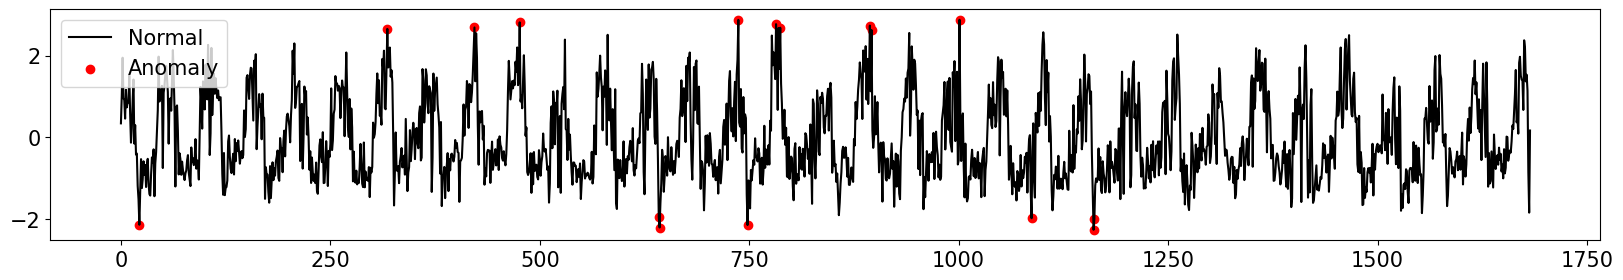

In [ ]:
wmaxdata['anomaly'] = model.predict(wmaxdata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = wmaxdata.loc[wmaxdata['anomaly'] == -1, [0]] #anomaly
ax.plot(wmaxdata.index, wmaxdata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
wmaxdata.head()

0  anomaly
0  0.342965        1
1  1.014210        1
2  1.950940        1
3  0.965255        1
4  0.910652        1

In [ ]:
from sklearn.ensemble import IsolationForest
wmindata=data_downsampled['WS10M_MIN'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(wmindata.values.reshape(-1, 1))
wmindata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(wmindata)

IsolationForest(contamination=0.01)

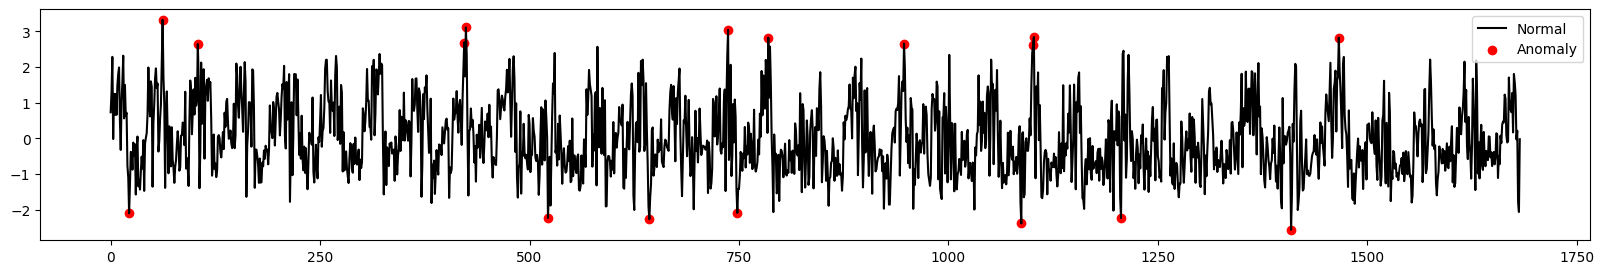

In [ ]:
wmindata['anomaly'] = model.predict(wmindata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = wmindata.loc[wmindata['anomaly'] == -1, [0]] #anomaly
ax.plot(wmindata.index, wmindata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
wmindata.head()

0  anomaly
0  0.732872        1
1  1.280177        1
2  2.287535        1
3 -0.017491        1
4  1.250035        1

**Anomaly treatment**

 **Smoothing**

> There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. Some of the common ones are:

* Smoothing: using rolling/moving average

* Aggression: by taking the mean for a certain time period (year/month)

> Smoothing is used to simplify the seasonal pattern i.e seasonal simplification

> Smoothening of a time series may be useful in:

* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.

* The smoothed version of series can be used as a feature to explain the original series itself.

* Visualize the underlying trend better

0         NaN
1         NaN
2    0.928868
3    0.674840
4    0.423567
5    0.835059
6    1.565674
7    2.052925
8    1.714150
9    1.091753
Name: SPI, dtype: float64


<Axes: >

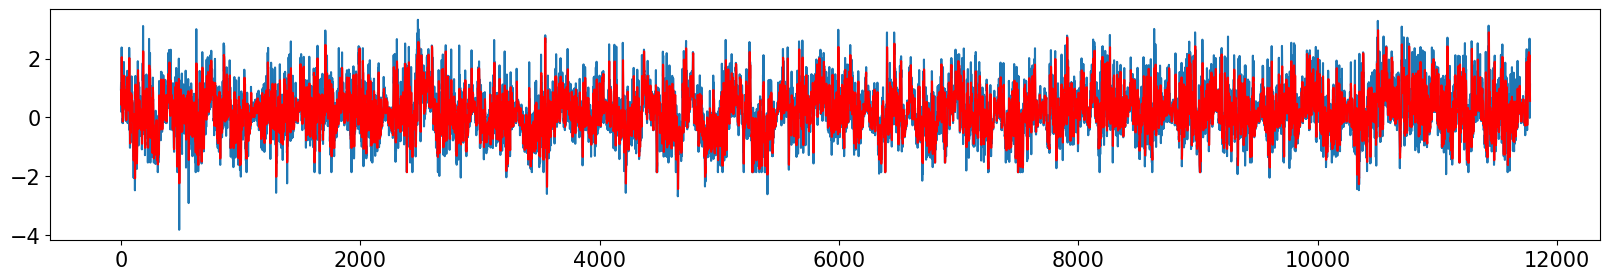

In [ ]:
from matplotlib import pyplot
#'T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN',
rolling = spi_data['SPI'].rolling(window=3)
spirolling_mean = rolling.mean()
print(spirolling_mean.head(10))
# plot original and transformed dataset
spi_data['SPI'].plot()
spirolling_mean.plot(color='red')
#pyplot.show()

date
1991-01-01         NaN
1991-01-08         NaN
1991-01-15         NaN
1991-01-22         NaN
1991-01-29    0.530000
1991-02-05    0.329714
1991-02-12    0.428857
1991-02-19    0.562857
1991-02-26    0.442571
1991-03-05    1.199429
Name: PRECTOTCORR, dtype: float64


<Axes: xlabel='date'>

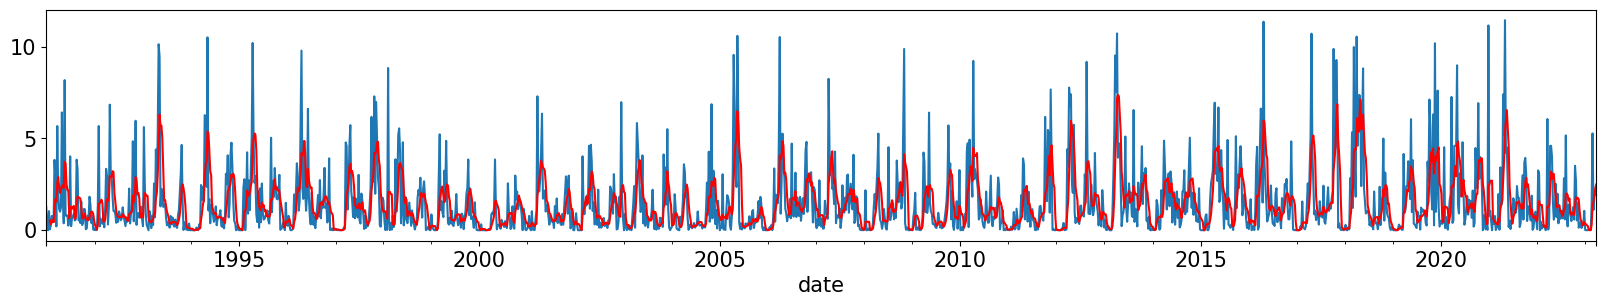

In [ ]:
from matplotlib import pyplot
rolling = pdata['PRECTOTCORR'].rolling(window=5)
prolling_mean = rolling.mean()
print(prolling_mean.head(10))
# plot original and transformed dataset
pdata['PRECTOTCORR'].plot()
prolling_mean.plot(color='red')
#pyplot.show()

date
1991-01-01          NaN
1991-01-08          NaN
1991-01-15          NaN
1991-01-22          NaN
1991-01-29    14.625429
1991-02-05    14.680000
1991-02-12    15.220286
1991-02-19    16.105714
1991-02-26    15.976857
1991-03-05    16.231714
Name: T2M_MIN, dtype: float64


<Axes: xlabel='date'>

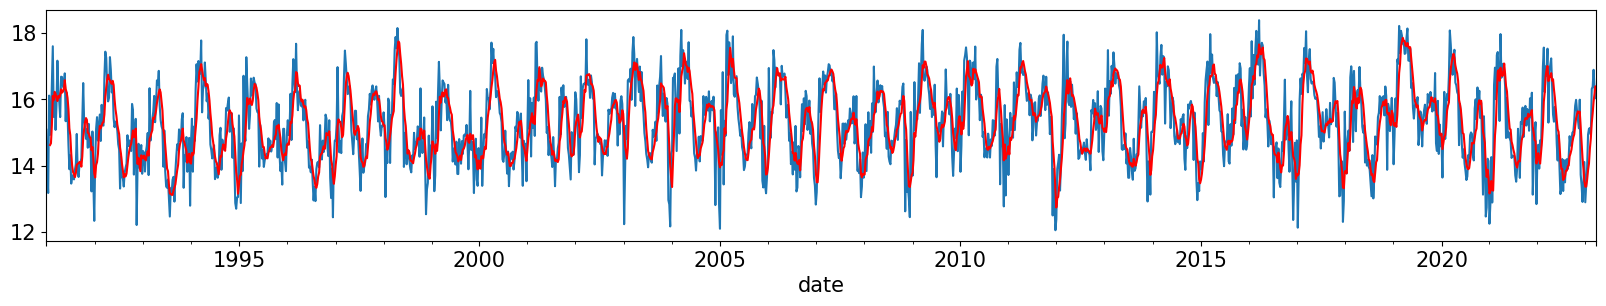

In [ ]:
from matplotlib import pyplot
#'T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN',PRECTOTCORR
rolling = tmindata['T2M_MIN'].rolling(window=5)
tminrolling_mean = rolling.mean()
print(tminrolling_mean.head(10))
# plot original and transformed dataset
tmindata['T2M_MIN'].plot()
tminrolling_mean.plot(color='red')
#pyplot.show()

date
1991-01-01          NaN
1991-01-08          NaN
1991-01-15          NaN
1991-01-22          NaN
1991-01-29    30.345143
1991-02-05    30.731714
1991-02-12    30.800857
1991-02-19    30.852571
1991-02-26    31.167429
1991-03-05    31.001143
Name: T2M_MAX, dtype: float64


<Axes: xlabel='date'>

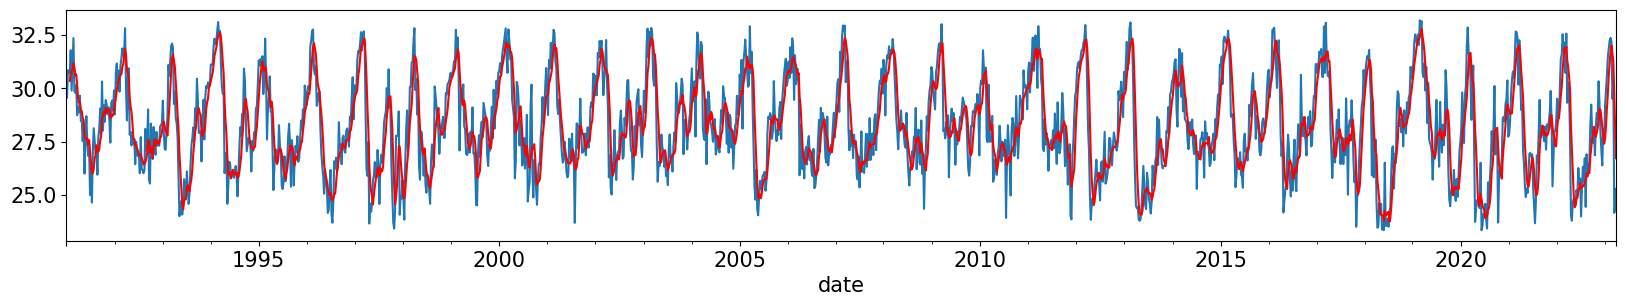

In [ ]:
from matplotlib import pyplot
#'T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN',
rolling = tmaxdata['T2M_MAX'].rolling(window=5)
tmaxrolling_mean = rolling.mean()
print(tmaxrolling_mean.head(10))
# plot original and transformed dataset
tmaxdata['T2M_MAX'].plot()
tmaxrolling_mean.plot(color='red')
#pyplot.show()

date
1991-01-01           NaN
1991-01-08           NaN
1991-01-15           NaN
1991-01-22           NaN
1991-01-29   -257.431429
1991-02-05   -257.098571
1991-02-12   -257.569143
1991-02-19   -258.402286
1991-02-26   -257.958571
1991-03-05   -258.380286
Name: T2M_RANGE, dtype: float64


<Axes: xlabel='date'>

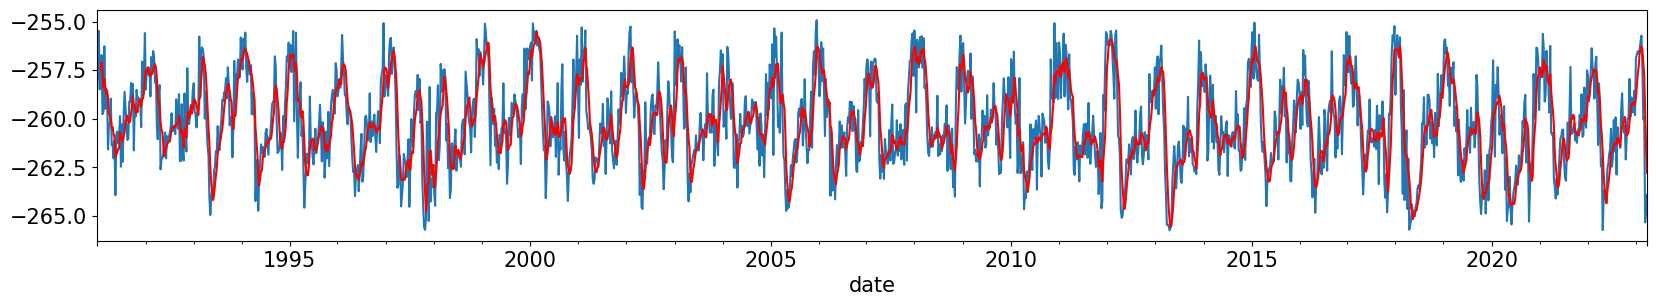

In [ ]:
from matplotlib import pyplot
#'T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN',
rolling = trngdata['T2M_RANGE'].rolling(window=5)
trngrolling_mean = rolling.mean()
print(trngrolling_mean.head(10))
# plot original and transformed dataset
trngdata['T2M_RANGE'].plot()
trngrolling_mean.plot(color='red')
#pyplot.show()

date
1991-01-01         NaN
1991-01-08         NaN
1991-01-15         NaN
1991-01-22         NaN
1991-01-29    8.362857
1991-02-05    8.398000
1991-02-12    8.444000
1991-02-19    8.074857
1991-02-26    8.043429
1991-03-05    8.026857
Name: WS10M_MAX, dtype: float64


<Axes: xlabel='date'>

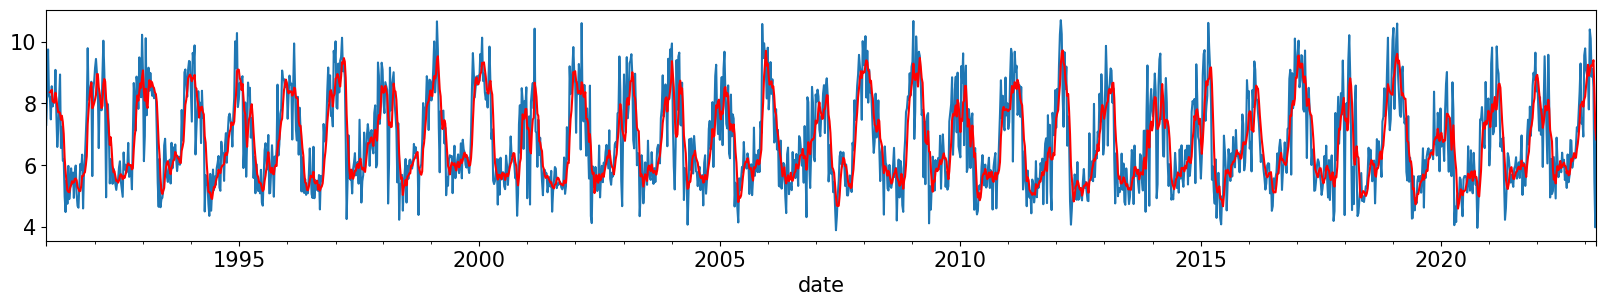

In [ ]:
from matplotlib import pyplot
#'T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN',
rolling = wmaxdata['WS10M_MAX'].rolling(window=5)
wmaxrolling_mean = rolling.mean()
print(wmaxrolling_mean.head(10))
# plot original and transformed dataset
wmaxdata['WS10M_MAX'].plot()
wmaxrolling_mean.plot(color='red')
#pyplot.show()

date
1991-01-01         NaN
1991-01-08         NaN
1991-01-15         NaN
1991-01-22         NaN
1991-01-29    3.820857
1991-02-05    3.807143
1991-02-12    3.801143
1991-02-19    3.508286
1991-02-26    3.778857
1991-03-05    3.878857
Name: WS10M_MIN, dtype: float64


<Axes: xlabel='date'>

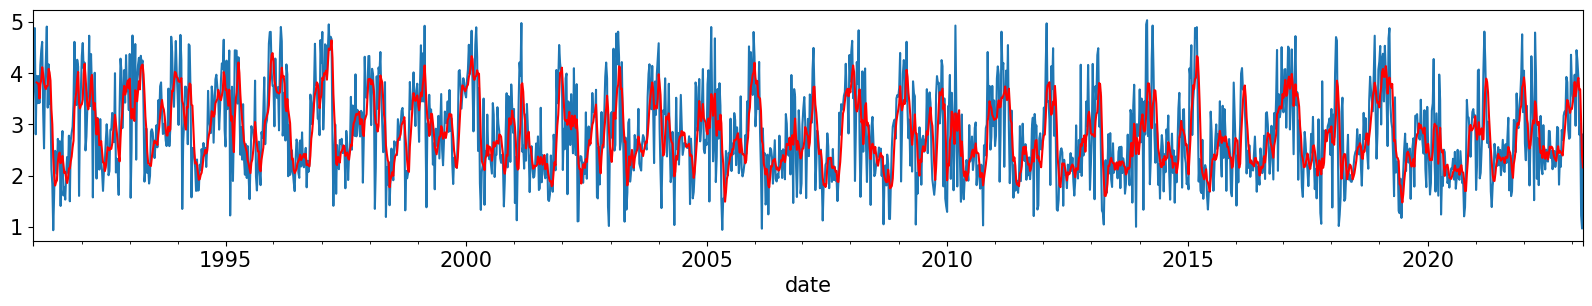

In [ ]:
from matplotlib import pyplot
#'T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN',
rolling = wmindata['WS10M_MIN'].rolling(window=5)
wminrolling_mean = rolling.mean()
print(wminrolling_mean.head(10))
# plot original and transformed dataset
wmindata['WS10M_MIN'].plot()
wminrolling_mean.plot(color='red')
#pyplot.show()

Text(0.5, 1.0, 'SPI')

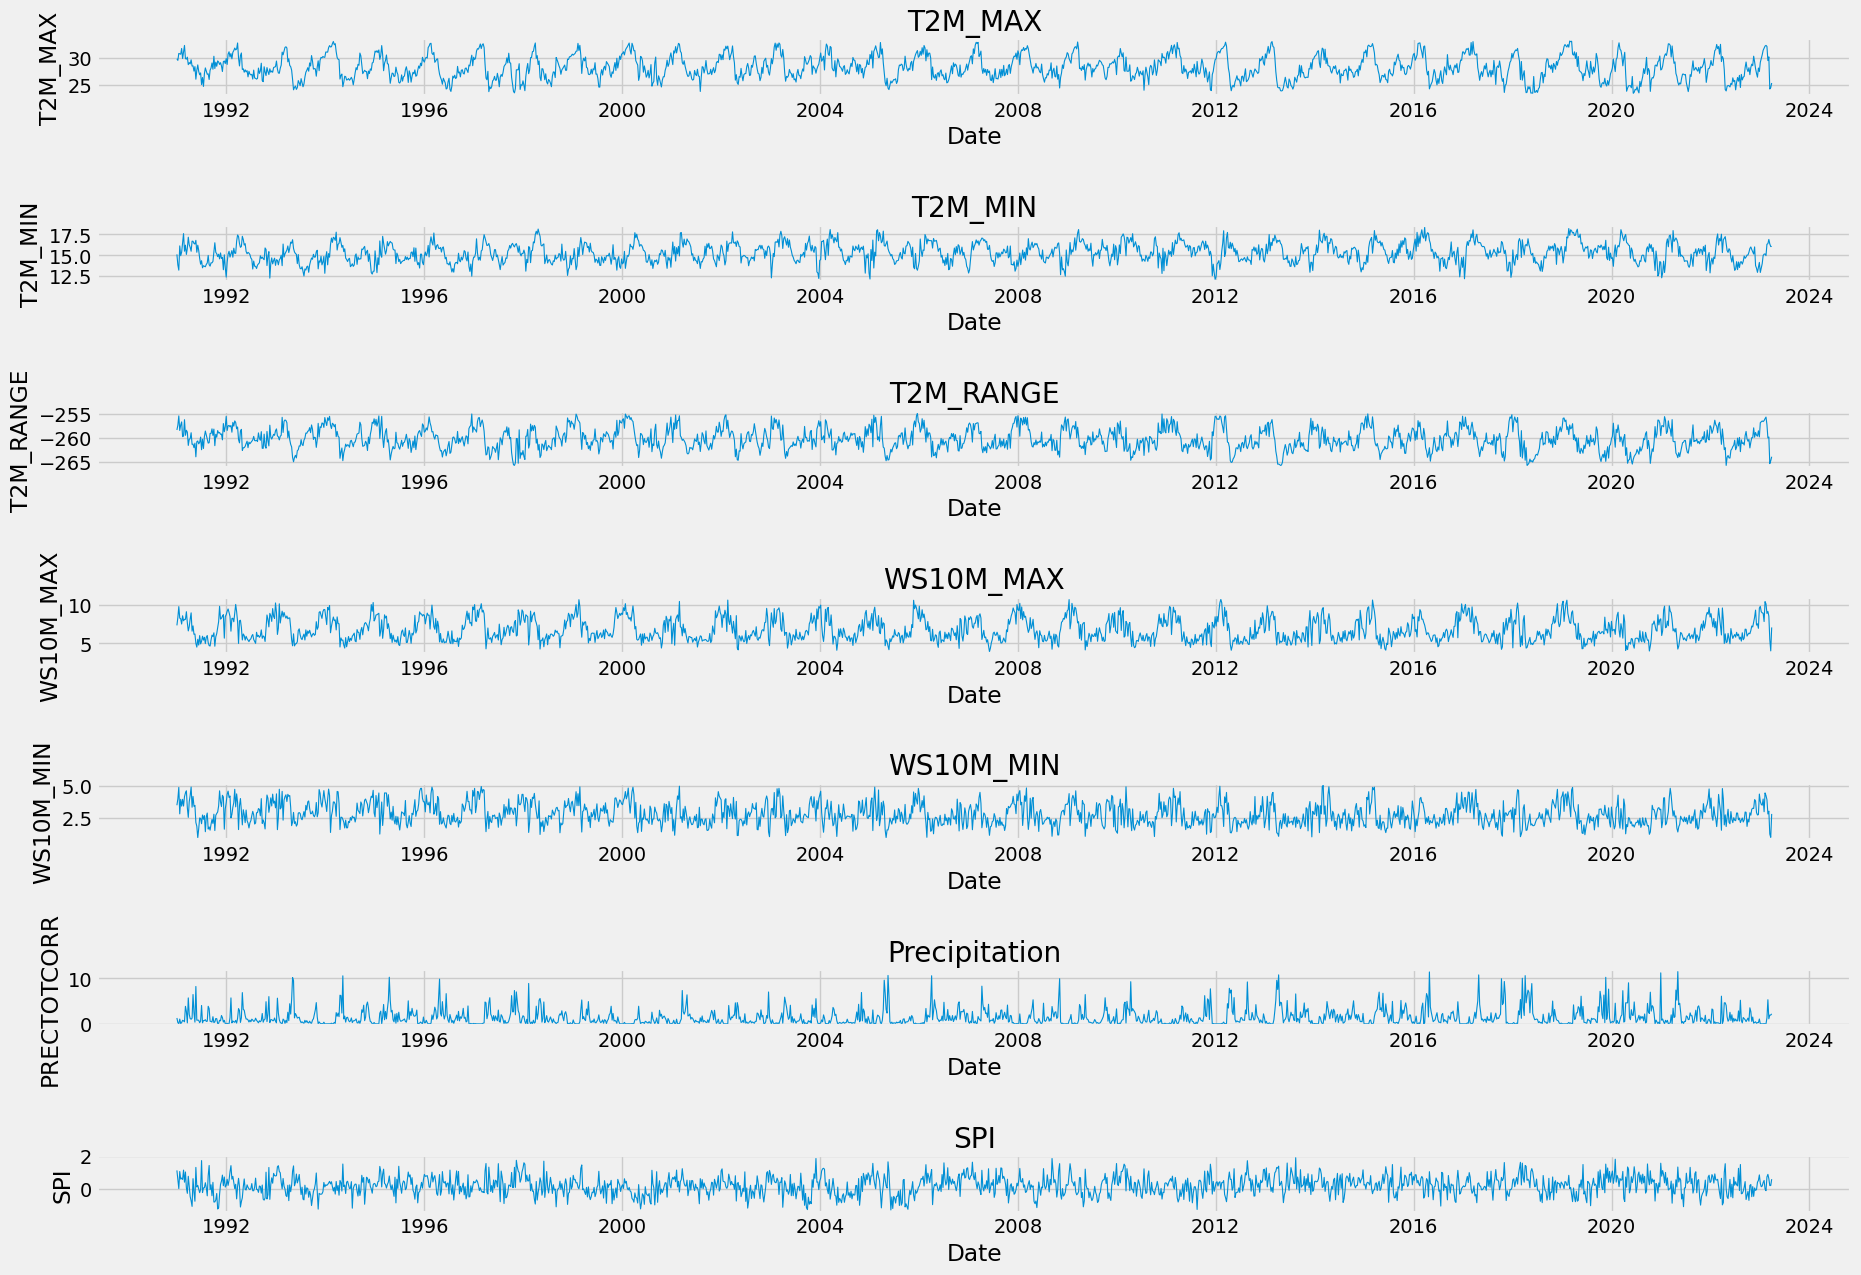

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=1, figsize=(20, 14), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(tmaxdata["T2M_MAX"],linewidth=0.8,)
axes[0][0].set_ylabel("T2M_MAX")
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('T2M_MAX')

# Graph for NDVI
axes[1][0].plot(tmindata["T2M_MIN"],linewidth=0.8)
axes[1][0].set_ylabel("T2M_MIN")
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('T2M_MIN')

# Graph for NDWI
axes[2][0].plot(trngdata["T2M_RANGE"],linewidth=0.8)
axes[2][0].set_ylabel("T2M_RANGE")
axes[2][0].set_xlabel("Date")
axes[2][0].set_title('T2M_RANGE')

# Graph for NDVI
axes[3][0].plot(wmaxdata["WS10M_MAX"],linewidth=0.8)
axes[3][0].set_ylabel("WS10M_MAX")
axes[3][0].set_xlabel("Date")
axes[3][0].set_title('WS10M_MAX')

# Graph for NDVI
axes[4][0].plot(wmindata["WS10M_MIN"],linewidth=0.8)
axes[4][0].set_ylabel("WS10M_MIN")
axes[4][0].set_xlabel("Date")
axes[4][0].set_title('WS10M_MIN')

axes[5][0].plot(pdata["PRECTOTCORR"],linewidth=0.8,)
axes[5][0].set_ylabel("PRECTOTCORR")
axes[5][0].set_xlabel("Date")
axes[5][0].set_title('Precipitation')

# Graph for NDWI
axes[6][0].plot(spidata["SPI"],linewidth=0.8)
axes[6][0].set_ylabel("SPI")
axes[6][0].set_xlabel("Date")
axes[6][0].set_title('SPI')

Text(0.5, 1.0, 'smoothed SPI')

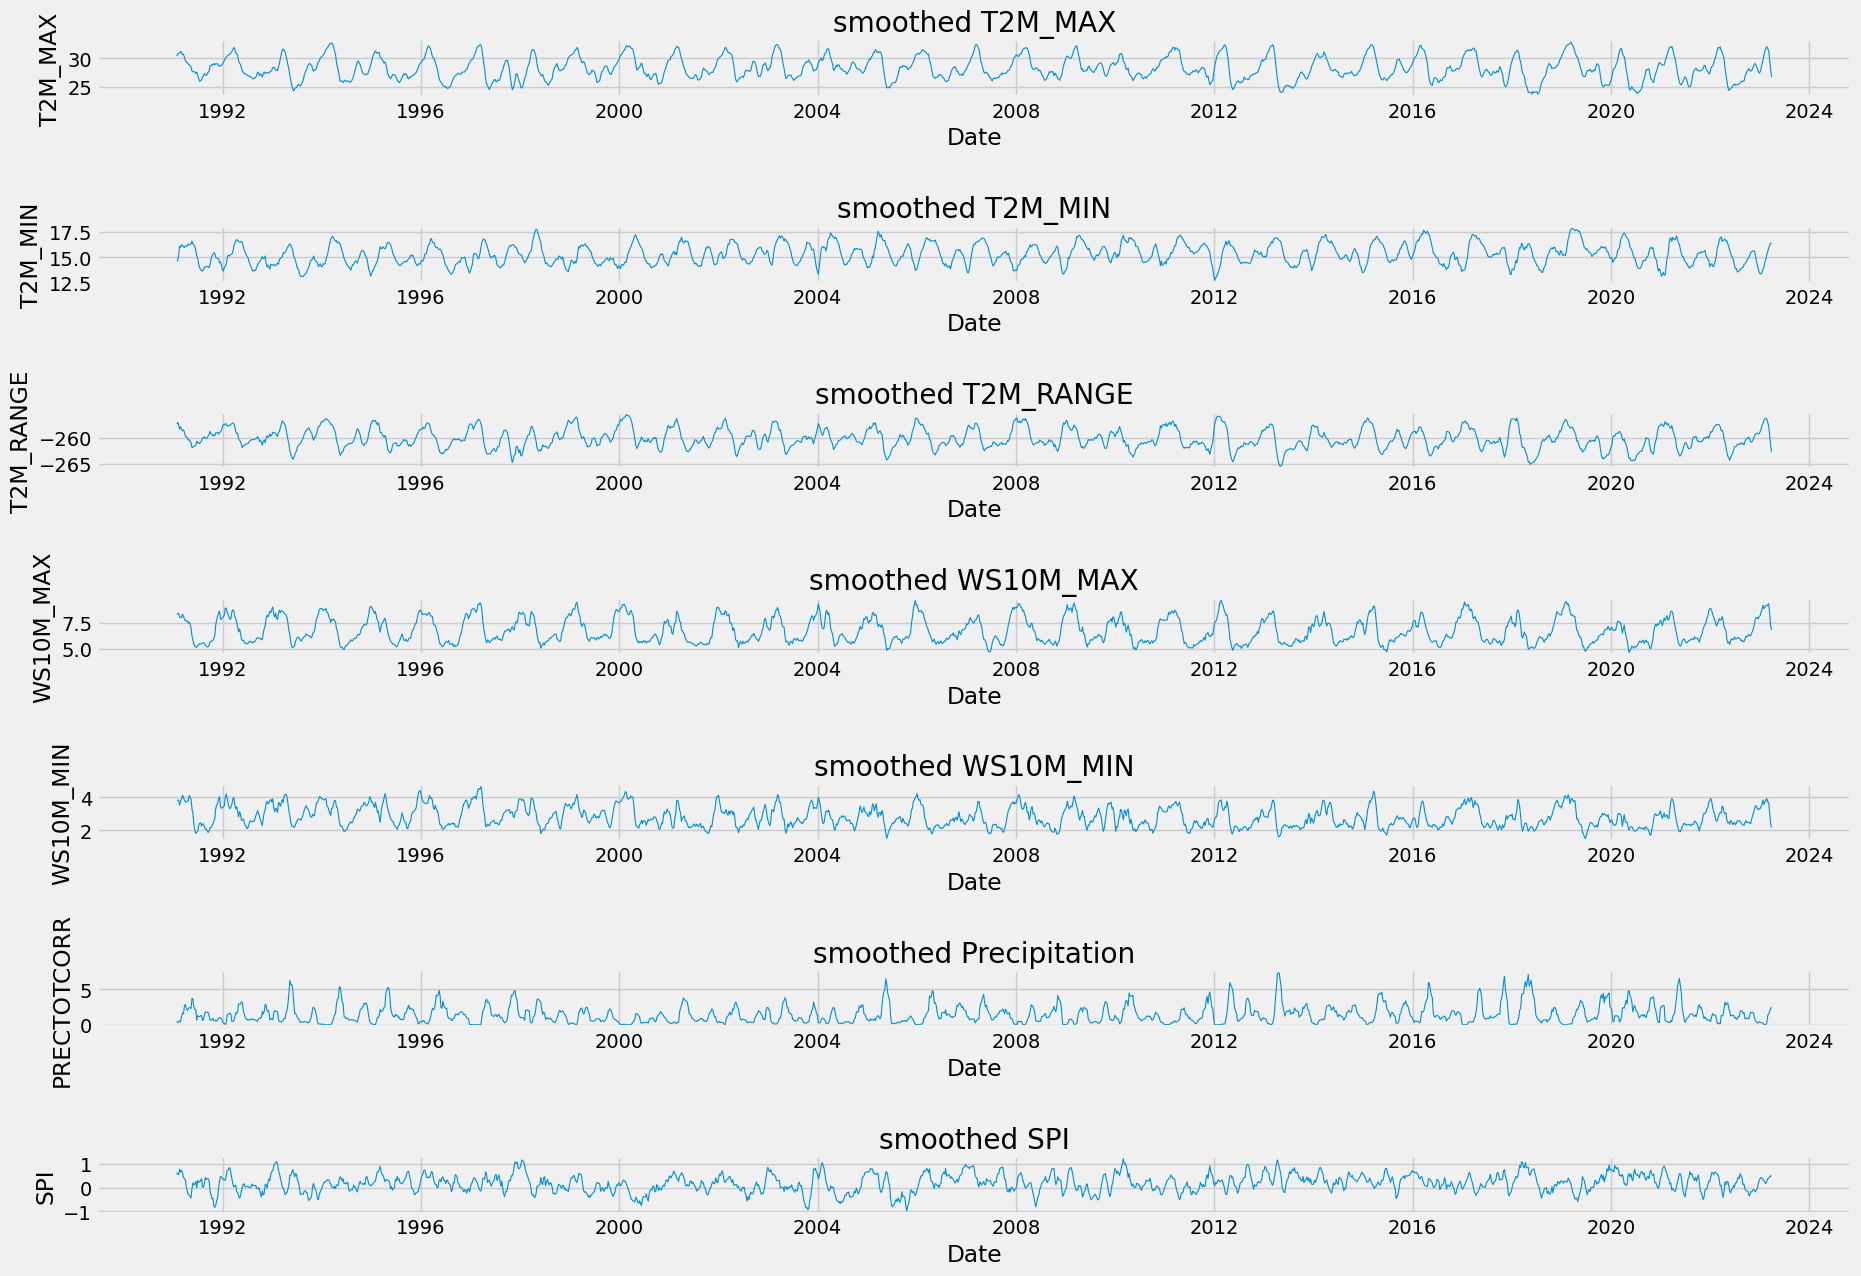

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=1, figsize=(20, 14), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(tmaxrolling_mean,linewidth=0.8,)
axes[0][0].set_ylabel("T2M_MAX")
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('smoothed T2M_MAX')

# Graph for NDVI
axes[1][0].plot(tminrolling_mean,linewidth=0.8)
axes[1][0].set_ylabel("T2M_MIN")
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('smoothed T2M_MIN')

# Graph for NDWI
axes[2][0].plot(trngrolling_mean,linewidth=0.8)
axes[2][0].set_ylabel("T2M_RANGE")
axes[2][0].set_xlabel("Date")
axes[2][0].set_title('smoothed T2M_RANGE')

# Graph for NDVI
axes[3][0].plot(wmaxrolling_mean,linewidth=0.8)
axes[3][0].set_ylabel("WS10M_MAX")
axes[3][0].set_xlabel("Date")
axes[3][0].set_title('smoothed WS10M_MAX')

# Graph for NDVI
axes[4][0].plot(wminrolling_mean,linewidth=0.8)
axes[4][0].set_ylabel("WS10M_MIN")
axes[4][0].set_xlabel("Date")
axes[4][0].set_title('smoothed WS10M_MIN')

axes[5][0].plot(prolling_mean,linewidth=0.8,)
axes[5][0].set_ylabel("PRECTOTCORR")
axes[5][0].set_xlabel("Date")
axes[5][0].set_title('smoothed Precipitation')

# Graph for NDWI
axes[6][0].plot(spirolling_mean,linewidth=0.8)
axes[6][0].set_ylabel("SPI")
axes[6][0].set_xlabel("Date")
axes[6][0].set_title('smoothed SPI')

In [ ]:
spidata=spirolling_mean[4:]
pdata=prolling_mean[4:]
tmindata=tminrolling_mean[4:]
tmaxdata=tmaxrolling_mean[4:]
wmindata=wminrolling_mean[4:]
trngdata=trngrolling_mean[4:]
wmaxdata=wmaxrolling_mean[4:]

In [ ]:
spi_data = pd.DataFrame(spidata)
p_data = pd.DataFrame(pdata)
tmin_data = pd.DataFrame(tmindata)
tmax_data = pd.DataFrame(tmaxdata)
trng_data = pd.DataFrame(trngdata)
wmin_data = pd.DataFrame(wmindata)
wmax_data = pd.DataFrame(wmaxdata)

In [ ]:
clean_METData = spi_data.join(p_data.join(tmin_data.join(tmax_data)))

In [ ]:
clean_METData = clean_METData.join(trng_data.join(wmin_data.join(wmax_data)))
clean_METData

SPI  PRECTOTCORR    T2M_MIN    T2M_MAX   T2M_RANGE  \
date                                                                  
1991-01-29  0.644588     0.530000  14.625429  30.345143 -257.431429   
1991-02-05  0.551844     0.329714  14.680000  30.731714 -257.098571   
1991-02-12  0.554402     0.428857  15.220286  30.800857 -257.569143   
1991-02-19  0.778456     0.562857  16.105714  30.852571 -258.402286   
1991-02-26  0.649131     0.442571  15.976857  31.167429 -257.958571   
...              ...          ...        ...        ...         ...   
2023-02-28  0.378414     1.323714  15.579143  31.614857 -257.115143   
2023-03-07  0.399931     1.534571  15.934857  31.292000 -257.793143   
2023-03-14  0.441327     1.918735  16.177143  29.678857 -259.648571   
2023-03-21  0.503340     2.302899  16.396857  28.092857 -261.454857   
2023-03-28  0.475670     2.482709  16.344476  26.717714 -262.776762   

            WS10M_MIN  WS10M_MAX  
date                              
1991-01-29   3.820857   8.362857  
1991-02-05   3.807143   8.398000  
1991-02-12   3.801143   8.444000  
1991-02-19   3.508286   8.074857  
1991-02-26   3.778857   8.043429  
...               ...        ...  
2023-02-28   3.678286   9.258000  
2023-03-07   3.686857   9.400857  
2023-03-14   3.040571   8.421429  
2023-03-21   2.385714   7.200000  
2023-03-28   2.162095   6.834952  

[1679 rows x 7 columns]

In [ ]:
# clean_METData.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/clean_METData.csv')

### Coorelation analysis

In [ ]:
original_cols = ['SPI','PRECTOTCORR','T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN']
corrmat = clean_METData[original_cols].corr()
corrmat.style.background_gradient(cmap = 'RdYlGn')

In [ ]:
original_cols = ['SPI','PRECTOTCORR','T2M_MAX', 'T2M_MIN','T2M_RANGE','WS10M_MAX','WS10M_MIN']
corrmat = clean_METData[original_cols].corr()
corrmat.style.background_gradient(cmap = 'RdYlGn')

In [ ]:
# Descriptive EDA after Cleaning and smoothing
display(clean_METData.describe()) # For numeric columns

print("\nSkewness: \n", clean_METData.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", clean_METData.kurtosis(axis = 0, skipna = True))

SPI  PRECTOTCORR      T2M_MIN      T2M_MAX    T2M_RANGE  \
count  1679.000000  1679.000000  1679.000000  1679.000000  1679.000000   
mean      0.189420     1.486891    15.296359    28.261651  -260.176796   
std       0.368189     1.279696     0.986814     1.956374     1.906503   
min      -0.994721     0.000571    12.741714    23.745429  -265.554857   
25%      -0.053986     0.543143    14.506571    26.889000  -261.436143   
50%       0.194422     1.142000    15.237714    27.979429  -260.417714   
75%       0.444004     2.074797    16.030571    29.684143  -258.793857   
max       1.223920     7.371143    17.859429    32.786000  -255.535714   

         WS10M_MIN    WS10M_MAX  
count  1679.000000  1679.000000  
mean      2.817578     6.783847  
std       0.616917     1.224068  
min       1.475714     4.596857  
25%       2.316571     5.739143  
50%       2.696033     6.408286  
75%       3.297286     7.817714  
max       4.645143     9.720286


Skewness: 
 SPI           -0.081846
PRECTOTCORR    1.432958
T2M_MIN        0.156835
T2M_MAX        0.209394
T2M_RANGE      0.098922
WS10M_MIN      0.420174
WS10M_MAX      0.424151
dtype: float64

Kurtosis: 
 SPI           -0.135214
PRECTOTCORR    2.273774
T2M_MIN       -0.717540
T2M_MAX       -0.660357
T2M_RANGE     -0.496204
WS10M_MIN     -0.771408
WS10M_MAX     -1.068954
dtype: float64
